In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from py_pol import degrees, np
from py_pol.mueller import Mueller, create_Mueller, set_printoptions
from py_pol.stokes import Stokes
from py_pol.jones_matrix import Jones_matrix
from py_pol.utils import azimuth_elipt_2_charac_angles, charac_angles_2_azimuth_elipt

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth =100)

## Create arrays

In [51]:
# Create several objectsat once
print(create_Mueller(['J1', 'J2', 'J3']))

print(create_Mueller(['J1']))

print(create_Mueller('J1', N=3))

J1, J2, J3 = create_Mueller(['J1', 'J2', 'J3'])
print(J1, J2, J3)

[J1 is empty
, J2 is empty
, J3 is empty
]
J1 is empty

[J1 is empty
, J1 is empty
, J1 is empty
]
J1 is empty
 J2 is empty
 J3 is empty



In [52]:
# From_components
J = Mueller()
J.from_components((1, 0.5, 0.5, 0, 1, 2, 3, 4, 5, 6, 7, 8 ,9 ,12 ,13, 16))
print(J)

list = []
for ind in range(16):
    list.append(np.arange(ind, 3+ind))
J.from_components(list)
print(J)

list = []
for ind in range(16):
    list.append(np.arange(ind, 6+ind))
J.from_components(list)
print(J)

list = []
for ind in range(16):
    list.append(np.random.rand(3,3)+ind)
J.from_components(list)
print(J)

M = 
[+1.000 +0.500 +0.500 +0.000]   
[+1.000 +2.000 +3.000 +4.000]   
[+5.000 +6.000 +7.000 +8.000]   
[+9.000 +12.000 +13.000 +16.000]   

M = 
[+0.000 +1.000 +2.000 +3.000]   [+1.000 +2.000 +3.000 +4.000]   [+2.000 +3.000 +4.000 +5.000]   
[+4.000 +5.000 +6.000 +7.000]   [+5.000 +6.000 +7.000 +8.000]   [+6.000 +7.000 +8.000 +9.000]   
[+8.000 +9.000 +10.000 +11.000]   [+9.000 +10.000 +11.000 +12.000]   [+10.000 +11.000 +12.000 +13.000]   
[+12.000 +13.000 +14.000 +15.000]   [+13.000 +14.000 +15.000 +16.000]   [+14.000 +15.000 +16.000 +17.000]   

M M00 = [0 1 2 3 4 5]
  M01 = [1 2 3 4 5 6]
  M02 = [2 3 4 5 6 7]
  M03 = [3 4 5 6 7 8]
  M10 = [4 5 6 7 8 9]
  M11 = [ 5  6  7  8  9 10]
  M12 = [ 6  7  8  9 10 11]
  M13 = [ 7  8  9 10 11 12]
  M20 = [ 8  9 10 11 12 13]
  M21 = [ 9 10 11 12 13 14]
  M22 = [10 11 12 13 14 15]
  M23 = [11 12 13 14 15 16]
  M30 = [12 13 14 15 16 17]
  M31 = [13 14 15 16 17 18]
  M32 = [14 15 16 17 18 19]
  M33 = [15 16 17 18 19 20]

M M00 =
 [[0.0236 0.1272 

In [53]:
# From_matrix
M = np.eye(4)
J = Mueller()
J.from_matrix(M)
print(J)

M = np.random.rand(4,4,3)
J = Mueller()
J.from_matrix(M)
print(J)

M = np.random.rand(4,4,3,2)
J = Mueller()
J.from_matrix(M)
print(J)

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +1.000 +0.000]   
[+0.000 +0.000 +0.000 +1.000]   

M = 
[+0.116 +0.013 +0.665 +0.734]   [+0.775 +0.223 +0.215 +0.489]   [+0.037 +0.493 +0.312 +0.791]   
[+0.914 +0.789 +0.750 +0.885]   [+0.588 +0.964 +0.419 +0.253]   [+0.192 +0.001 +0.455 +0.770]   
[+0.944 +0.314 +0.643 +0.210]   [+0.289 +0.467 +0.225 +0.368]   [+0.386 +0.621 +0.318 +0.449]   
[+0.125 +0.398 +0.486 +0.674]   [+0.928 +0.533 +0.787 +0.552]   [+0.414 +0.365 +0.244 +0.436]   

M M00 =
 [[0.3095 0.1113]
 [0.3426 0.4507]
 [0.9913 0.9156]]
M M01 =
 [[0.3391 0.4344]
 [0.389  0.3318]
 [0.1603 0.1374]]
M M02 =
 [[0.4863 0.9112]
 [0.9286 0.4679]
 [0.956  0.2356]]
M M03 =
 [[0.5827 0.4515]
 [0.5081 0.2144]
 [0.6567 0.6941]]
M M10 =
 [[0.4107 0.093 ]
 [0.7398 0.6587]
 [0.8047 0.1966]]
M M11 =
 [[0.0543 0.4583]
 [0.9427 0.5356]
 [0.3491 0.8116]]
M M12 =
 [[0.8765 0.1171]
 [0.8945 0.0999]
 [0.929  0.7175]]
M M13 =
 [[0.5433 0.4352]
 [0.6849 0.5655

In [54]:
# From blocks
M00 = 1
P = [1, 2, 3]
D = [1.5, 2.5, 3.5]
m = [[4, 5, 6], [7, 8, 9], [10, 11, 12]]
M = Mueller()
M.from_blocks(M00=M00, D=D, P=P, m=m)
print(M)

M00 = [2, 3]
P = [[4, 5, 6], [7, 8, 9]]
D = [[7, 8, 9], [10, 11, 12]]
m = np.random.rand(3,3,2)
M = Mueller()
M.from_blocks(M00=M00, D=D, P=P, m=m)
print(M)

M00 = np.random.rand(4, 5)
P = np.random.rand(3, 4, 5)
D = np.random.rand(3, 4, 5)
m = np.random.rand(3, 3, 4, 5)
M = Mueller()
M.from_blocks(M00=M00, D=D, P=P, m=m)

M = 
[+1.000 +1.500 +2.500 +3.500]   
[+1.000 +4.000 +5.000 +6.000]   
[+2.000 +7.000 +8.000 +9.000]   
[+3.000 +10.000 +11.000 +12.000]   

M = 
[+2.000 +14.000 +16.000 +18.000]   [+3.000 +30.000 +33.000 +36.000]   
[+8.000 +0.661 +1.597 +0.885]   [+21.000 +1.078 +0.763 +1.132]   
[+10.000 +0.503 +1.378 +0.548]   [+24.000 +1.860 +2.482 +1.276]   
[+12.000 +1.214 +0.084 +0.315]   [+27.000 +1.760 +2.286 +1.138]   



M M00 =
 [[0.2542 0.9328 0.4157 0.288  0.0162]
 [0.4761 0.9363 0.7023 0.6034 0.4756]
 [0.3576 0.6697 0.014  0.5519 0.6608]
 [0.1411 0.2069 0.2597 0.3154 0.9196]]
M M01 =
 [[0.1331 0.361  0.0064 0.1837 0.0093]
 [0.0234 0.6642 0.0432 0.1325 0.3553]
 [0.1026 0.555  0.0056 0.4174 0.2422]
 [0.0239 0.0769 0.0764 0.2775 0.7047]]
M M02 =
 [[0.1006 0.0457 0.2    0.0152 0.0003]
 [0.0167 0.1246 0.3275 0.3113 0.2673]
 [0.1557 0.2812 0.0022 0.0974 0.1135]
 [0.0082 0.0957 0.1199 0.0666 0.5929]]
M M03 =
 [[0.1619 0.5187 0.0257 0.0933 0.0122]
 [0.3999 0.0633 0.0496 0.3324 0.0309]
 [0.314  0.2113 0.0067 0.3781 0.0426]
 [0.0326 0.0183 0.1835 0.0888 0.067 ]]
M M10 =
 [[0.1184 0.8911 0.2312 0.0833 0.0126]
 [0.1176 0.9119 0.516  0.1121 0.0293]
 [0.0095 0.083  0.0018 0.4064 0.5129]
 [0.108  0.0912 0.1943 0.2076 0.0025]]
M M11 =
 [[0.2343 0.0084 0.1431 0.0736 0.0121]
 [0.2647 0.2635 0.1005 0.0591 0.4587]
 [0.2738 0.0754 0.0113 0.4286 0.6555]
 [0.0723 0.0088 0.0249 0.1426 0.8679]]
M M12 =
 [[0.0661 0.7675 0.1

In [55]:
# vacuum
M = Mueller()
M.vacuum(length=3)
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   [+0.000 +1.000 +0.000 +0.000]   [+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +1.000 +0.000]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 +0.000 +1.000 +0.000]   
[+0.000 +0.000 +0.000 +1.000]   [+0.000 +0.000 +0.000 +1.000]   [+0.000 +0.000 +0.000 +1.000]   



In [56]:
# filter_amplifier
M = Mueller()
M.filter_amplifier(D=3)
print(M)


M = Mueller()
M.filter_amplifier(D=np.random.rand(3,5))
print(M)

M = 
[+3.000 +0.000 +0.000 +0.000]   
[+0.000 +3.000 +0.000 +0.000]   
[+0.000 +0.000 +3.000 +0.000]   
[+0.000 +0.000 +0.000 +3.000]   

M M00 =
 [[0.4619 0.1734 0.9961 0.86   0.3641]
 [0.796  0.4934 0.6469 0.9134 0.4329]
 [0.7218 0.8825 0.2958 0.7459 0.5119]]
M M01 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M02 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M03 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M10 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M11 =
 [[0.4619 0.1734 0.9961 0.86   0.3641]
 [0.796  0.4934 0.6469 0.9134 0.4329]
 [0.7218 0.8825 0.2958 0.7459 0.5119]]
M M12 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M13 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M20 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M21 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M22 =
 [[0.4619 0.1734 0.9961 0.86   0.3641]
 [0.796  0.4934 0.6469 0.9134 0.4329]
 [0.7218 0.8825 0

In [57]:
# mirror
M = Mueller()
M.mirror(length=3)
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   [+0.000 +1.000 +0.000 +0.000]   [+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 -1.000 +0.000]   [+0.000 +0.000 -1.000 +0.000]   [+0.000 +0.000 -1.000 +0.000]   
[+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.000 +0.000 -1.000]   



In [58]:
# depolarizer
M = Mueller()
M.depolarizer(d=np.random.rand(3,5))
print(M)

M M00 =
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
M M01 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M02 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M03 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M10 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M11 =
 [[0.191  0.3131 0.444  0.9935 0.494 ]
 [0.67   0.5442 0.5873 0.832  0.187 ]
 [0.8358 0.2001 0.6389 0.6386 0.8523]]
M M12 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M13 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M20 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M21 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M22 =
 [[0.191  0.3131 0.444  0.9935 0.494 ]
 [0.67   0.5442 0.5873 0.832  0.187 ]
 [0.8358 0.2001 0.6389 0.6386 0.8523]]
M M23 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M30 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M31 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0

In [59]:
# diattenuator_perfect
M = Mueller()
M.diattenuator_perfect(azimuth=np.random.rand(3,5) * 180*degrees)
print(M)

M M00 =
 [[0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5]]
M M01 =
 [[-0.4651  0.3468  0.1409 -0.0718 -0.5   ]
 [ 0.4742 -0.0584  0.3907 -0.4932 -0.0486]
 [ 0.2781  0.1159 -0.4919  0.3153  0.4554]]
M M02 =
 [[-0.1836  0.3602 -0.4797  0.4948 -0.0015]
 [-0.1586  0.4966  0.312   0.082  -0.4976]
 [-0.4156 -0.4864 -0.0894  0.388   0.2065]]
M M03 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M10 =
 [[-0.4651  0.3468  0.1409 -0.0718 -0.5   ]
 [ 0.4742 -0.0584  0.3907 -0.4932 -0.0486]
 [ 0.2781  0.1159 -0.4919  0.3153  0.4554]]
M M11 =
 [[0.4326 0.2405 0.0397 0.0103 0.5   ]
 [0.4497 0.0068 0.3053 0.4866 0.0047]
 [0.1546 0.0269 0.484  0.1989 0.4147]]
M M12 =
 [[ 0.1708  0.2498 -0.1352 -0.071   0.0015]
 [-0.1504 -0.058   0.2438 -0.0809  0.0484]
 [-0.2311 -0.1127  0.088   0.2447  0.1881]]
M M13 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M20 =
 [[-0.1836  0.3602 -0.4797  0.4948 -0.0015]
 [-0.1586  0.4966  0.312   0.082  -0.4976]
 [-0.4156 -0.4864 

In [60]:
# diattenuator_linear
M = Mueller()
M.diattenuator_linear(p2=0.5)
print(M)

M = 
[+0.625 +0.375 +0.000 +0.000]   
[+0.375 +0.625 +0.000 +0.000]   
[+0.000 +0.000 +0.500 +0.000]   
[+0.000 +0.000 +0.000 +0.500]   



In [61]:
# from_Jones
M = np.array([[1, 0], [0, 1j]])
J = Jones_matrix()
J.from_matrix(M)
M = Mueller()
M.from_Jones(J)
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 -1.000]   
[+0.000 +0.000 +1.000 +0.000]   



In [62]:
# diattenuator_vector
D = [0, 1, 0]
M = Mueller()
M.diattenuator_vector(D)
print(M)

D = np.random.rand(3,5)
M = Mueller()
M.diattenuator_vector(D)
print(M)

D = np.random.rand(3,2, 5)
M = Mueller()
M.diattenuator_vector(D)
print(M)

M = 
[+0.500 +0.000 +0.500 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   
[+0.500 +0.000 +0.500 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   

M = 
[+0.632 +0.197 +0.309 +0.034]   [+0.730 +0.151 +0.182 +0.130]   [+0.640 +0.316 +0.149 +0.086]   [+0.511 +0.113 +0.122 +0.460]   [+0.500 +0.343 +0.356 +0.076]   
[+0.197 +0.548 +0.053 +0.006]   [+0.151 +0.695 +0.020 +0.014]   [+0.316 +0.615 +0.040 +0.023]   [+0.113 +0.165 +0.021 +0.079]   [+0.343 +0.235 +0.244 +0.052]   
[+0.309 +0.053 +0.598 +0.009]   [+0.182 +0.020 +0.702 +0.017]   [+0.149 +0.040 +0.548 +0.011]   [+0.122 +0.021 +0.168 +0.086]   [+0.356 +0.244 +0.254 +0.054]   
[+0.034 +0.006 +0.009 +0.515]   [+0.130 +0.014 +0.017 +0.691]   [+0.086 +0.023 +0.011 +0.536]   [+0.460 +0.079 +0.086 +0.468]   [+0.076 +0.052 +0.054 +0.011]   

M M00 =
 [[0.5    0.5    0.5    0.5    0.5   ]
 [0.5105 0.5    0.5885 0.6033 0.5274]]
M M01 =
 [[0.1553 0.3544 0.043  0.2034 0.0859]
 [0.3831 0.2966 0.1515 0.3867 0.1458]]
M M02 =
 [[0.3257 0.323  0.4284 0.2381 0

In [63]:
# diattenuator_charac_angles
M = Mueller()
M.diattenuator_charac_angles(Tmax=0.9, Tmin=0.3, alpha=45*degrees, delay=30*degrees)
print(M)


M = Mueller()
P1 = np.random.rand(5)
M.diattenuator_charac_angles(Tmax=0.9, Tmin=P1, alpha=45*degrees, delay=30*degrees)
print(M)


M = Mueller()
angle = np.random.rand(3,5) * 90*degrees
M.diattenuator_charac_angles(Tmax=0.9, Tmin=0.3, alpha=angle, delay=30*degrees)
print(M)

M = 
[+0.600 +0.000 +0.260 +0.150]   
[+0.000 +0.520 +0.000 +0.000]   
[+0.260 +0.000 +0.580 +0.035]   
[+0.150 +0.000 +0.035 +0.540]   

M = 
[+0.851 +0.000 +0.042 +0.024]   [+0.947 -0.000 -0.041 -0.024]   [+0.586 +0.000 +0.272 +0.157]   [+0.465 +0.000 +0.377 +0.217]   [+0.501 +0.000 +0.345 +0.199]   
[+0.000 +0.850 +0.000 +0.000]   [-0.000 +0.946 +0.000 +0.000]   [+0.000 +0.495 +0.000 +0.000]   [+0.000 +0.165 +0.000 +0.000]   [+0.000 +0.304 +0.000 +0.000]   
[+0.042 +0.000 +0.851 +0.001]   [-0.041 +0.000 +0.947 +0.001]   [+0.272 +0.000 +0.563 +0.040]   [+0.377 +0.000 +0.390 +0.130]   [+0.345 +0.000 +0.452 +0.085]   
[+0.024 +0.000 +0.001 +0.850]   [-0.024 +0.000 +0.001 +0.947]   [+0.157 +0.000 +0.040 +0.517]   [+0.217 +0.000 +0.130 +0.240]   [+0.199 +0.000 +0.085 +0.354]   

M M00 =
 [[0.6 0.6 0.6 0.6 0.6]
 [0.6 0.6 0.6 0.6 0.6]
 [0.6 0.6 0.6 0.6 0.6]]
M M01 =
 [[ 0.1062 -0.0447 -0.123   0.2902  0.2536]
 [ 0.2875  0.2092 -0.1025 -0.015   0.2118]
 [ 0.2711 -0.2949  0.1186 -0.2563  0.1

In [64]:
# diattenuator_azimuth_ellipticity
M = Mueller()
M.diattenuator_azimuth_ellipticity(Tmax=0.9, Tmin=0.3, azimuth=45*degrees, ellipticity=30*degrees)
print(M)


M = Mueller()
P1 = np.random.rand(5)
M.diattenuator_azimuth_ellipticity(Tmax=0.9, Tmin=P1, azimuth=45*degrees, ellipticity=30*degrees)
print(M)


M = Mueller()
angle = np.random.rand(3,5) * 90*degrees
M.diattenuator_azimuth_ellipticity(Tmax=0.9, Tmin=0.3, azimuth=angle, ellipticity=30*degrees)
print(M)

M = 
[+0.600 +0.000 +0.150 +0.260]   
[+0.000 +0.520 +0.000 +0.000]   
[+0.150 +0.000 +0.540 +0.035]   
[+0.260 +0.000 +0.035 +0.580]   

M = 
[+0.502 +0.000 +0.199 +0.345]   [+0.859 +0.000 +0.020 +0.035]   [+0.687 +0.000 +0.106 +0.184]   [+0.908 -0.000 -0.004 -0.007]   [+0.942 -0.000 -0.021 -0.036]   
[+0.000 +0.306 +0.000 +0.000]   [+0.000 +0.858 +0.000 +0.000]   [+0.000 +0.653 +0.000 +0.000]   [-0.000 +0.908 +0.000 +0.000]   [-0.000 +0.941 +0.000 +0.000]   
[+0.199 +0.000 +0.355 +0.085]   [+0.020 +0.000 +0.858 +0.000]   [+0.106 +0.000 +0.662 +0.015]   [-0.004 +0.000 +0.908 +0.000]   [-0.021 +0.000 +0.941 +0.000]   
[+0.345 +0.000 +0.085 +0.453]   [+0.035 +0.000 +0.000 +0.859]   [+0.184 +0.000 +0.015 +0.679]   [-0.007 +0.000 +0.000 +0.908]   [-0.036 +0.000 +0.000 +0.942]   

M M00 =
 [[0.6 0.6 0.6 0.6 0.6]
 [0.6 0.6 0.6 0.6 0.6]
 [0.6 0.6 0.6 0.6 0.6]]
M M01 =
 [[-0.0615 -0.1494 -0.0746  0.0349 -0.1424]
 [-0.1331  0.0865 -0.1464  0.1075  0.0853]
 [ 0.1185 -0.117   0.1031 -0.0981  0.0

In [65]:
# retarder_vector
D = [0, 1, 0]
M = Mueller()
M.retarder_vector(D)
print(M)

D = [0, 135*degrees, 0]
M = Mueller()
M.retarder_vector(D, kind='complete')
print(M)

D = [0, 135*degrees/np.pi, 0]
M = Mueller()
M.retarder_vector(D, kind='straight')
print(M)

D = np.random.rand(3,5)
M = Mueller()
M.retarder_vector(D, kind='complete')
print(M)

D = np.random.rand(3,4, 5)
M = Mueller()
M.retarder_vector(D, kind='complete')
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 -1.000]   
[+0.000 +0.000 +1.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 -0.707 +0.000 -0.707]   
[+0.000 +0.000 +1.000 +0.000]   
[+0.000 +0.707 +0.000 -0.707]   

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 -0.707 +0.000 -0.707]   
[+0.000 +0.000 +1.000 +0.000]   
[+0.000 +0.707 +0.000 -0.707]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   
[+0.000 +0.631 +0.727 -0.271]   [+0.000 +0.987 +0.161 -0.015]   [+0.000 +0.923 +0.214 -0.319]   [+0.000 +0.806 +0.515 -0.292]   [+0.000 +0.611 +0.198 -0.767]   
[+0.000 -0.214 +0.498 +0.840]   [+0.000 -0.160 +0.987 +0.022]   [+0.000 -0.122 +0.950 +0.286]   [+0.000 -0.401 +0.838 +0.370]   [+0.000 -0.173 +0.978 +0.114]   
[+0.000 +0.746 -0.472 +0.470]   [+0.000 +0.018 -0.020 +1.000]   [+0.000 +0.365 -0.226 +0.903]   [+

In [66]:
# retarder_linear
M = Mueller()
M.retarder_linear(R=45*degrees)
print(M)

M = Mueller()
M.retarder_linear(R=45*degrees, azimuth=np.linspace(0, 90*degrees, 5))
print(M)

M = Mueller()
M.retarder_linear(R=45*degrees, azimuth=np.random.rand(3,5))
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +0.707 +0.707]   
[+0.000 +0.000 -0.707 +0.707]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   [+0.000 +0.854 +0.146 -0.500]   [+0.000 +0.707 +0.000 -0.707]   [+0.000 +0.854 -0.146 -0.500]   [+0.000 +1.000 -0.000 -0.000]   
[+0.000 +0.000 +0.707 +0.707]   [+0.000 +0.146 +0.854 +0.500]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 -0.146 +0.854 -0.500]   [+0.000 -0.000 +0.707 -0.707]   
[+0.000 +0.000 -0.707 +0.707]   [+0.000 +0.500 -0.500 +0.707]   [+0.000 +0.707 -0.000 +0.707]   [+0.000 +0.500 +0.500 +0.707]   [+0.000 +0.000 +0.707 +0.707]   

M M00 =
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
M M01 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M02 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M03 =
 [[0. 0. 0. 

In [67]:
# diattenuator_retarder_linear
M = Mueller()
M.diattenuator_retarder_linear(p2=0.5, R=45*degrees)
print(M)

M = Mueller()
M.diattenuator_retarder_linear(p2=0.5, R=45*degrees, azimuth=np.linspace(0, 90*degrees, 5))
print(M)

M = Mueller()
M.diattenuator_retarder_linear(p2=0.5, R=45*degrees, azimuth=np.random.rand(3,5))
print(M)

M = 
[+0.625 +0.625 +0.000 +0.000]   
[+0.625 +0.625 +0.000 +0.000]   
[+0.000 +0.000 +0.354 +0.354]   
[+0.000 +0.000 -0.354 +0.354]   

M = 
[+0.625 +0.625 +0.000 +0.000]   [+0.625 +0.442 +0.442 +0.000]   [+0.625 +0.000 +0.625 +0.000]   [+0.625 -0.442 +0.442 +0.000]   [+0.625 -0.625 +0.000 +0.000]   
[+0.625 +0.625 +0.000 +0.000]   [+0.442 +0.489 +0.136 -0.250]   [+0.000 +0.354 +0.000 -0.354]   [-0.442 +0.489 -0.136 -0.250]   [-0.625 +0.625 -0.000 -0.000]   
[+0.000 +0.000 +0.354 +0.354]   [+0.442 +0.136 +0.489 +0.250]   [+0.625 +0.000 +0.625 +0.000]   [+0.442 -0.136 +0.489 -0.250]   [+0.000 -0.000 +0.354 -0.354]   
[+0.000 +0.000 -0.354 +0.354]   [+0.000 +0.250 -0.250 +0.354]   [+0.000 +0.354 -0.000 +0.354]   [+0.000 +0.250 +0.250 +0.354]   [+0.000 +0.000 +0.354 +0.354]   

M M00 =
 [[0.625 0.625 0.625 0.625 0.625]
 [0.625 0.625 0.625 0.625 0.625]
 [0.625 0.625 0.625 0.625 0.625]]
M M01 =
 [[ 0.3585 -0.1562  0.5655  0.5479  0.5094]
 [ 0.6039  0.1322 -0.1901  0.4193  0.586 ]
 [ 0.131

In [68]:
# quarter_waveplate
M = Mueller()
M.quarter_waveplate()
print(M)

M = Mueller()
M.quarter_waveplate(azimuth=np.linspace(0, 90*degrees, 5))
print(M)

M = Mueller()
M.quarter_waveplate(azimuth=np.random.rand(3,5))
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +1.000]   
[+0.000 +0.000 -1.000 +0.000]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   [+0.000 +0.500 +0.500 -0.707]   [+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.500 -0.500 -0.707]   [+0.000 +1.000 -0.000 -0.000]   
[+0.000 +0.000 +0.000 +1.000]   [+0.000 +0.500 +0.500 +0.707]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 -0.500 +0.500 -0.707]   [+0.000 -0.000 +0.000 -1.000]   
[+0.000 +0.000 -1.000 +0.000]   [+0.000 +0.707 -0.707 +0.000]   [+0.000 +1.000 -0.000 +0.000]   [+0.000 +0.707 +0.707 +0.000]   [+0.000 +0.000 +1.000 +0.000]   

M M00 =
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
M M01 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M02 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M03 =
 [[0. 0. 0. 

In [69]:
# half_waveplate
M = Mueller()
M.half_waveplate()
print(M)

M = Mueller()
M.half_waveplate(azimuth=np.linspace(0, 90*degrees, 5))
print(M)

M = Mueller()
M.half_waveplate(azimuth=np.random.rand(3,5))
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 -1.000 +0.000]   
[+0.000 +0.000 +0.000 -1.000]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 -1.000 +0.000 +0.000]   [+0.000 -0.000 -1.000 +0.000]   [+0.000 +1.000 -0.000 +0.000]   
[+0.000 +0.000 -1.000 +0.000]   [+0.000 +1.000 +0.000 +0.000]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 -1.000 +0.000 +0.000]   [+0.000 -0.000 -1.000 +0.000]   
[+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.000 +0.000 -1.000]   

M M00 =
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
M M01 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M02 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M03 =
 [[0. 0. 0. 

In [70]:
# retarder_charac_angles
M = Mueller()
M.retarder_charac_angles(R=90*degrees, alpha=0, delay=0)
print(M)

M = Mueller()
M.retarder_charac_angles(R=90*degrees, alpha=np.linspace(0, 90*degrees, 5), delay=0)
print(M)

M = Mueller()
M.retarder_charac_angles(R=90*degrees, alpha=np.linspace(0, 90*degrees, 15), delay=np.random.rand(3,5)*360*degrees)
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +1.000]   
[+0.000 +0.000 -1.000 +0.000]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   [+0.000 +0.500 +0.500 -0.707]   [+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.500 -0.500 -0.707]   [+0.000 +1.000 -0.000 -0.000]   
[+0.000 +0.000 +0.000 +1.000]   [+0.000 +0.500 +0.500 +0.707]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 -0.500 +0.500 -0.707]   [+0.000 -0.000 +0.000 -1.000]   
[+0.000 +0.000 -1.000 +0.000]   [+0.000 +0.707 -0.707 +0.000]   [+0.000 +1.000 -0.000 +0.000]   [+0.000 +0.707 +0.707 +0.000]   [+0.000 +0.000 +1.000 +0.000]   

M M00 =
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
M M01 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M02 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M03 =
 [[0. 0. 0. 

In [71]:
# retarder_azimuth_ellipticity
M = Mueller()
M.retarder_azimuth_ellipticity(R=90*degrees, azimuth=0, ellipticity=0)
print(M)

M = Mueller()
M.retarder_azimuth_ellipticity(R=90*degrees, azimuth=np.linspace(0, 90*degrees, 5), ellipticity=0)
print(M)

M = Mueller()
M.retarder_azimuth_ellipticity(R=90*degrees, azimuth=np.linspace(0, 90*degrees, 15), ellipticity=np.random.rand(3,5)*45*degrees)
print(M)

M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +1.000]   
[+0.000 +0.000 -1.000 +0.000]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   [+1.000 +0.000 +0.000 +0.000]   
[+0.000 +1.000 +0.000 +0.000]   [+0.000 +0.500 +0.500 -0.707]   [+0.000 +0.000 +0.000 -1.000]   [+0.000 +0.500 -0.500 -0.707]   [+0.000 +1.000 -0.000 -0.000]   
[+0.000 +0.000 +0.000 +1.000]   [+0.000 +0.500 +0.500 +0.707]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 -0.500 +0.500 -0.707]   [+0.000 -0.000 +0.000 -1.000]   
[+0.000 +0.000 -1.000 +0.000]   [+0.000 +0.707 -0.707 +0.000]   [+0.000 +1.000 -0.000 +0.000]   [+0.000 +0.707 +0.707 +0.000]   [+0.000 +0.000 +1.000 +0.000]   

M M00 =
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
M M01 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M02 =
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
M M03 =
 [[0. 0. 0. 

## Operations

In [72]:
M00 = 2
P = [1, 2, 3]
D = [1.5, 2.5, 3.5]
m = [[4, 5, 6], [7, 8, 9], [10, 11, 12]]
M = Mueller()
M.from_blocks(M00=M00, D=D, P=P, m=m)
_ = M.parameters.blocks(verbose=True)

The block components of M are:
  - M_00 of M is:
2.0

  - Diattenuation vector of M is:
  D[0]
[0.75]
  D[1]
[1.25]
  D[2]
[1.75]

  - Polarizance vector of M is:
  P[0]
[0.5]
  P[1]
[1.]
  P[2]
[1.5]

  - Small matrix of M is:
  m[0,0]
[2.]
  m[0,1]
[2.5]
  m[0,2]
[3.]
  m[1,0]
[3.5]
  m[1,1]
[4.]
  m[1,2]
[4.5]
  m[2,0]
[5.]
  m[2,1]
[5.5]
  m[2,2]
[6.]



In [73]:
# Sum
M1, M2 = create_Mueller(('M1', 'M2'))
M1.mirror()
M2.depolarizer(d=.5)
print(M1 + M2)


M2.depolarizer(d=[.5, .3])
print(M1 + M2)

M1 + M2 = 
[+2.000 +0.000 +0.000 +0.000]   
[+0.000 +1.500 +0.000 +0.000]   
[+0.000 +0.000 -0.500 +0.000]   
[+0.000 +0.000 +0.000 -0.500]   

M1 + M2 = 
[+2.000 +0.000 +0.000 +0.000]   [+2.000 +0.000 +0.000 +0.000]   
[+0.000 +1.500 +0.000 +0.000]   [+0.000 +1.300 +0.000 +0.000]   
[+0.000 +0.000 -0.500 +0.000]   [+0.000 +0.000 -0.700 +0.000]   
[+0.000 +0.000 +0.000 -0.500]   [+0.000 +0.000 +0.000 -0.700]   



In [74]:
# Multiply by number, right
M1 = Mueller()
M1.depolarizer(d=.5)
print(M1 * 3)

# Multiply by array, right
M1 = Mueller()
M1.depolarizer(d=.5)
print(M1 * np.linspace(1, 3, 5))

3 * M = 
[+3.000 +0.000 +0.000 +0.000]   
[+0.000 +1.500 +0.000 +0.000]   
[+0.000 +0.000 +1.500 +0.000]   
[+0.000 +0.000 +0.000 +1.500]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.500 +0.000 +0.000 +0.000]   [+2.000 +0.000 +0.000 +0.000]   [+2.500 +0.000 +0.000 +0.000]   [+3.000 +0.000 +0.000 +0.000]   
[+0.000 +0.500 +0.000 +0.000]   [+0.000 +0.750 +0.000 +0.000]   [+0.000 +1.000 +0.000 +0.000]   [+0.000 +1.250 +0.000 +0.000]   [+0.000 +1.500 +0.000 +0.000]   
[+0.000 +0.000 +0.500 +0.000]   [+0.000 +0.000 +0.750 +0.000]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 +0.000 +1.250 +0.000]   [+0.000 +0.000 +1.500 +0.000]   
[+0.000 +0.000 +0.000 +0.500]   [+0.000 +0.000 +0.000 +0.750]   [+0.000 +0.000 +0.000 +1.000]   [+0.000 +0.000 +0.000 +1.250]   [+0.000 +0.000 +0.000 +1.500]   



In [75]:
# Divide by number, right
M1 = Mueller()
M1.depolarizer(d=.5)
print(M1 / 3)

# Divide by array, right
M1 = Mueller()
M1.depolarizer(d=.5)
print(M1 / np.linspace(1, 3, 5))

M / 3 = 
[+0.333 +0.000 +0.000 +0.000]   
[+0.000 +0.167 +0.000 +0.000]   
[+0.000 +0.000 +0.167 +0.000]   
[+0.000 +0.000 +0.000 +0.167]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+0.667 +0.000 +0.000 +0.000]   [+0.500 +0.000 +0.000 +0.000]   [+0.400 +0.000 +0.000 +0.000]   [+0.333 +0.000 +0.000 +0.000]   
[+0.000 +0.500 +0.000 +0.000]   [+0.000 +0.333 +0.000 +0.000]   [+0.000 +0.250 +0.000 +0.000]   [+0.000 +0.200 +0.000 +0.000]   [+0.000 +0.167 +0.000 +0.000]   
[+0.000 +0.000 +0.500 +0.000]   [+0.000 +0.000 +0.333 +0.000]   [+0.000 +0.000 +0.250 +0.000]   [+0.000 +0.000 +0.200 +0.000]   [+0.000 +0.000 +0.167 +0.000]   
[+0.000 +0.000 +0.000 +0.500]   [+0.000 +0.000 +0.000 +0.333]   [+0.000 +0.000 +0.000 +0.250]   [+0.000 +0.000 +0.000 +0.200]   [+0.000 +0.000 +0.000 +0.167]   



In [76]:
# Multiply by number, left
M1 = Mueller()
M1.depolarizer(d=.5)
print(3 * M1)

# Multiply by array, left
M1 = Mueller()
M1.depolarizer(d=.5)
print(np.linspace(1, 3, 5) * M1)

3 * M = 
[+3.000 +0.000 +0.000 +0.000]   
[+0.000 +1.500 +0.000 +0.000]   
[+0.000 +0.000 +1.500 +0.000]   
[+0.000 +0.000 +0.000 +1.500]   

M = 
[+1.000 +0.000 +0.000 +0.000]   [+1.500 +0.000 +0.000 +0.000]   [+2.000 +0.000 +0.000 +0.000]   [+2.500 +0.000 +0.000 +0.000]   [+3.000 +0.000 +0.000 +0.000]   
[+0.000 +0.500 +0.000 +0.000]   [+0.000 +0.750 +0.000 +0.000]   [+0.000 +1.000 +0.000 +0.000]   [+0.000 +1.250 +0.000 +0.000]   [+0.000 +1.500 +0.000 +0.000]   
[+0.000 +0.000 +0.500 +0.000]   [+0.000 +0.000 +0.750 +0.000]   [+0.000 +0.000 +1.000 +0.000]   [+0.000 +0.000 +1.250 +0.000]   [+0.000 +0.000 +1.500 +0.000]   
[+0.000 +0.000 +0.000 +0.500]   [+0.000 +0.000 +0.000 +0.750]   [+0.000 +0.000 +0.000 +1.000]   [+0.000 +0.000 +0.000 +1.250]   [+0.000 +0.000 +0.000 +1.500]   



In [77]:
# Multiply two matrices
M1 = Mueller('M1')
M1.from_components((1, 2, 3, 5, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4))
M2 = Mueller('M2')
M2.from_components((1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4))
print(M1 * M2)

# Multiply two matrices, 1D
M1 = Mueller('M1')
M1.from_components((1, 2, 3, 5, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4))
M2 = Mueller('M2')
M2.from_components((1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4), length=3)
print(M1 * M2)

M1 * M2 = 
[+34.000 +34.000 +34.000 +34.000]   
[+30.000 +30.000 +30.000 +30.000]   
[+30.000 +30.000 +30.000 +30.000]   
[+30.000 +30.000 +30.000 +30.000]   

M1 * M2 = 
[+34.000 +34.000 +34.000 +34.000]   [+34.000 +34.000 +34.000 +34.000]   [+34.000 +34.000 +34.000 +34.000]   
[+30.000 +30.000 +30.000 +30.000]   [+30.000 +30.000 +30.000 +30.000]   [+30.000 +30.000 +30.000 +30.000]   
[+30.000 +30.000 +30.000 +30.000]   [+30.000 +30.000 +30.000 +30.000]   [+30.000 +30.000 +30.000 +30.000]   
[+30.000 +30.000 +30.000 +30.000]   [+30.000 +30.000 +30.000 +30.000]   [+30.000 +30.000 +30.000 +30.000]   



In [78]:
# getitem
M = np.random.rand(4, 4, 3, 5)
J = Mueller('Test')
J.from_matrix(M)
print(J)

J2 = J[0]
print(J2)

J2 = J[0:3]
print(J2)

J3 = J[1, 1]
print(J3)

J3 = J[0:3, 0:2]
print(J3)

J4 = J[np.linspace(2, 6, 3, dtype=int)]
print(J4)

aux = M[0,0,:,:] > 0.5
J4 = J[aux]
print(J4)

Test M00 =
 [[0.0214 0.4113 0.1717 0.147  0.7908]
 [0.5106 0.2762 0.801  0.1617 0.7953]
 [0.9395 0.3372 0.3885 0.3096 0.8059]]
Test M01 =
 [[0.8084 0.3186 0.6449 0.1778 0.5572]
 [0.135  0.4588 0.6108 0.2045 0.0675]
 [0.4759 0.98   0.612  0.3082 0.5617]]
Test M02 =
 [[0.9639 0.2417 0.5852 0.8669 0.5414]
 [0.633  0.4538 0.0217 0.7927 0.0104]
 [0.1829 0.3763 0.0716 0.8915 0.3818]]
Test M03 =
 [[0.2709 0.0207 0.306  0.4734 0.9734]
 [0.0159 0.8852 0.6186 0.1008 0.1013]
 [0.7633 0.855  0.3609 0.6386 0.8659]]
Test M10 =
 [[0.5087 0.9336 0.3307 0.1852 0.6014]
 [0.2155 0.7115 0.2462 0.3639 0.9228]
 [0.4824 0.538  0.107  0.5265 0.9757]]
Test M11 =
 [[0.0187 0.1257 0.3134 0.5739 0.9492]
 [0.8484 0.1362 0.8929 0.0886 0.2695]
 [0.1912 0.4186 0.2268 0.0972 0.8267]]
Test M12 =
 [[0.1651 0.6128 0.5133 0.8693 0.9237]
 [0.3046 0.524  0.105  0.4526 0.8371]
 [0.8713 0.5475 0.3117 0.2861 0.6599]]
Test M13 =
 [[0.0142 0.4004 0.2005 0.9381 0.5285]
 [0.562  0.7916 0.8481 0.5653 0.4113]
 [0.1641 0.73   0.185  

In [79]:
# setitem
M = np.random.rand(4, 4, 3, 5)
J = Mueller('Test')
J2 = Mueller('New')
J.from_matrix(M)
print(J)

J2.vacuum()
J[0] = J2
print(J)

angle = np.array([0, 45, 90]) * degrees
J2.diattenuator_linear(p1=1, p2=0, azimuth=angle)
J.from_matrix(M)
J[0:3] = J2
print(J)

J2.vacuum()
J.from_matrix(M)
J[1,1] = J2
print(J)

J2.vacuum(length=6)
J2.shape = [3, 2]
J.from_matrix(M)
J[0:3, 0:2] = J2
print(J)

J2.vacuum(length=3)
J.from_matrix(M)
J[np.linspace(2, 6, 3, dtype=int)] = J2
print(J)

J2.vacuum()
aux = M[0,0,:,:] > 0.5
J.from_matrix(M)
J[aux] = J2
print(J)

Test M00 =
 [[0.0554 0.5783 0.9067 0.6215 0.992 ]
 [0.0331 0.4133 0.6154 0.3132 0.4252]
 [0.4643 0.7808 0.2803 0.178  0.855 ]]
Test M01 =
 [[0.7591 0.1471 0.2673 0.32   0.5913]
 [0.0142 0.7668 0.8901 0.3728 0.1776]
 [0.6668 0.5478 0.5126 0.0853 0.2793]]
Test M02 =
 [[0.0232 0.7872 0.7214 0.4097 0.4035]
 [0.5984 0.6364 0.5992 0.4415 0.4415]
 [0.681  0.3904 0.9225 0.4106 0.0695]]
Test M03 =
 [[0.7387 0.2357 0.8125 0.367  0.1894]
 [0.7293 0.7672 0.2703 0.6493 0.2438]
 [0.7172 0.3685 0.4719 0.4221 0.6317]]
Test M10 =
 [[0.6722 0.4759 0.2986 0.0239 0.6871]
 [0.8951 0.2342 0.7333 0.9596 0.0667]
 [0.3219 0.2621 0.5519 0.9578 0.5756]]
Test M11 =
 [[0.5245 0.3113 0.8599 0.9454 0.6639]
 [0.3626 0.632  0.522  0.7139 0.2785]
 [0.7035 0.6561 0.6615 0.1262 0.1201]]
Test M12 =
 [[0.9046 0.9898 0.0073 0.6769 0.0012]
 [0.0668 0.8398 0.4743 0.9921 0.4432]
 [0.172  0.7751 0.8663 0.3104 0.3686]]
Test M13 =
 [[0.9259 0.1916 0.0419 0.9725 0.1061]
 [0.3454 0.6886 0.3461 0.1425 0.1327]
 [0.2765 0.5137 0.1632 

## Manipulations

In [80]:
# Reciprocal
M = np.random.rand(4,4)
M1 = Mueller()
M1.from_matrix(M)
M1.reciprocal(keep=False)
print(M1)

Reciprocal of M = 
[+0.798 +0.854 -0.124 +0.816]   
[+0.040 +0.724 -0.365 +0.012]   
[-0.316 -0.723 +0.959 -0.486]   
[+0.575 +0.624 -0.203 +0.383]   



In [81]:
# Covariance
M = np.array([[1, -0.0299, 0.0027, 0.0058],
             [-0.0186, 0.9956, -0.0361, 0.0318],
             [-0.0129, 0.0392, 0.2207, -0.9656],
             [0.0014, 0.028, 0.9706, 0.2231]])
M1 = Mueller()
M1.from_matrix(M)
print(M1)
M1.covariance_matrix(keep=False)
print(M1)

M = np.array([M, M])
M1 = Mueller()
M1.from_matrix(M)
print(M1)
M1.covariance_matrix(keep=False)
print(M1)

M = 
[+1.000 -0.030 +0.003 +0.006]   
[-0.019 +0.996 -0.036 +0.032]   
[-0.013 +0.039 +0.221 -0.966]   
[+0.001 +0.028 +0.971 +0.223]   

Covariant of M = 
[+0.487+0.000j -0.008+0.009j +0.007-0.007j +0.111-0.484j]   
[-0.008-0.009j +0.004+0.000j -0.001-0.001j -0.013+0.007j]   
[+0.007+0.007j -0.001+0.001j -0.002+0.000j +0.010-0.007j]   
[+0.111+0.484j -0.013-0.007j +0.010+0.007j +0.511+0.000j]   

M = 
[+1.000 -0.030 +0.003 +0.006]   [+1.000 -0.030 +0.003 +0.006]   
[-0.019 +0.996 -0.036 +0.032]   [-0.019 +0.996 -0.036 +0.032]   
[-0.013 +0.039 +0.221 -0.966]   [-0.013 +0.039 +0.221 -0.966]   
[+0.001 +0.028 +0.971 +0.223]   [+0.001 +0.028 +0.971 +0.223]   

Covariant of M = 
[+0.487+0.000j -0.008+0.009j +0.007-0.007j +0.111-0.484j]   [+0.487+0.000j -0.008+0.009j +0.007-0.007j +0.111-0.484j]   
[-0.008-0.009j +0.004+0.000j -0.001-0.001j -0.013+0.007j]   [-0.008-0.009j +0.004+0.000j -0.001-0.001j -0.013+0.007j]   
[+0.007+0.007j -0.001+0.001j -0.002+0.000j +0.010-0.007j]   [+0.007+0.007

In [82]:
# Inverse
M = np.random.rand(4,4)
print(M)
M_inv = np.linalg.inv(M)
print(M_inv)
M1 = Mueller()
M1.from_matrix(M)
M1.inverse(keep=False)
print(M1)

M = np.array([M, M])
M1 = Mueller()
M1.from_matrix(M)
print(M1)
M1.inverse(keep=False)
print(M1)

[[0.2113 0.6562 0.4445 0.6203]
 [0.2865 0.3199 0.0611 0.6079]
 [0.7648 0.1212 0.7774 0.011 ]
 [0.2347 0.0215 0.001  0.9286]]
[[-1.9129  3.696   0.8048 -1.1515]
 [ 0.475   2.4554 -0.4621 -1.9193]
 [ 1.8013 -4.005   0.5694  1.4121]
 [ 0.4706 -0.9866 -0.1934  1.4108]]
Inverse of M = 
[-1.913 +3.696 +0.805 -1.151]   
[+0.475 +2.455 -0.462 -1.919]   
[+1.801 -4.005 +0.569 +1.412]   
[+0.471 -0.987 -0.193 +1.411]   

M = 
[+0.211 +0.656 +0.445 +0.620]   [+0.211 +0.656 +0.445 +0.620]   
[+0.287 +0.320 +0.061 +0.608]   [+0.287 +0.320 +0.061 +0.608]   
[+0.765 +0.121 +0.777 +0.011]   [+0.765 +0.121 +0.777 +0.011]   
[+0.235 +0.021 +0.001 +0.929]   [+0.235 +0.021 +0.001 +0.929]   

Inverse of M = 
[-1.913 +3.696 +0.805 -1.151]   [-1.913 +3.696 +0.805 -1.151]   
[+0.475 +2.455 -0.462 -1.919]   [+0.475 +2.455 -0.462 -1.919]   
[+1.801 -4.005 +0.569 +1.412]   [+1.801 -4.005 +0.569 +1.412]   
[+0.471 -0.987 -0.193 +1.411]   [+0.471 -0.987 -0.193 +1.411]   



In [83]:
# Sum
M = np.random.rand(4,4,7)
M_sum = np.sum(M, axis=2)
print(M_sum)
M1 = Mueller()
M1.from_matrix(M)
M1.sum(keep=False)
print(M1)

M = np.random.rand(4,4,7, 2)
M_sum = np.sum(M, axis=2)
print(M_sum)
M1 = Mueller()
M1.from_matrix(M)
M1.sum(keep=False, axis=0)
print(M1)

[[5.309  4.2061 3.6281 3.5439]
 [2.669  4.6322 3.0738 3.2535]
 [3.5243 2.9116 3.2432 3.4303]
 [3.6708 3.8093 2.8564 2.2033]]
Sum of M = 
[+5.309 +4.206 +3.628 +3.544]   
[+2.669 +4.632 +3.074 +3.254]   
[+3.524 +2.912 +3.243 +3.430]   
[+3.671 +3.809 +2.856 +2.203]   

[[[4.8964 3.4212]
  [2.5672 3.486 ]
  [3.9572 5.2886]
  [4.3773 2.6875]]

 [[2.8894 4.1885]
  [4.7509 2.6814]
  [3.7311 2.4155]
  [2.3505 3.386 ]]

 [[3.6454 4.463 ]
  [3.6717 4.5116]
  [3.3715 3.0658]
  [2.9249 4.0204]]

 [[3.3842 4.74  ]
  [3.7373 3.3563]
  [3.3755 3.7718]
  [2.4653 4.8752]]]
Sum of M = 
[+4.896 +2.567 +3.957 +4.377]   [+3.421 +3.486 +5.289 +2.688]   
[+2.889 +4.751 +3.731 +2.351]   [+4.188 +2.681 +2.415 +3.386]   
[+3.645 +3.672 +3.372 +2.925]   [+4.463 +4.512 +3.066 +4.020]   
[+3.384 +3.737 +3.376 +2.465]   [+4.740 +3.356 +3.772 +4.875]   



In [84]:
# Prod
M = np.random.rand(4,4,7)
M1 = Mueller()
M1.from_matrix(M)
M1.prod(keep=False)
print(M1)

M = np.random.rand(4,4,7, 2)
M1 = Mueller()
M1.from_matrix(M)
M1.prod(keep=False, axis=0)
print(M1)

Prod of M = 
[+27.610 +30.360 +43.331 +36.545]   
[+32.820 +36.117 +51.543 +43.455]   
[+18.577 +20.437 +29.165 +24.593]   
[+20.965 +23.071 +32.926 +27.759]   

Prod of M = 
[+31.871 +41.276 +34.374 +38.879]   [+27.406 +44.937 +49.031 +28.333]   
[+7.607 +9.848 +8.199 +9.275]   [+32.536 +53.360 +58.225 +33.636]   
[+19.995 +25.907 +21.585 +24.406]   [+22.436 +36.786 +40.138 +23.194]   
[+30.491 +39.486 +32.881 +37.192]   [+30.619 +50.215 +54.794 +31.653]   



In [85]:
# Rotation
M = Mueller()
M.diattenuator_linear(azimuth=45*degrees)
M.rotate(-45*degrees)
print(M)


M = Mueller()
M.diattenuator_linear()
M.rotate(np.linspace(0,90,5)*degrees)
print(M)

M @ 45.00 deg @ -45.00 deg = 
[+0.500 +0.500 +0.000 +0.000]   
[+0.500 +0.500 +0.000 +0.000]   
[+0.000 +0.000 -0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   

M = 
[+0.500 +0.500 +0.000 +0.000]   [+0.500 +0.354 +0.354 +0.000]   [+0.500 +0.000 +0.500 +0.000]   [+0.500 -0.354 +0.354 +0.000]   [+0.500 -0.500 +0.000 +0.000]   
[+0.500 +0.500 +0.000 +0.000]   [+0.354 +0.250 +0.250 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [-0.354 +0.250 -0.250 +0.000]   [-0.500 +0.500 -0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   [+0.354 +0.250 +0.250 +0.000]   [+0.500 +0.000 +0.500 +0.000]   [+0.354 -0.250 +0.250 +0.000]   [+0.000 -0.000 +0.000 +0.000]   
[+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   [+0.000 +0.000 +0.000 +0.000]   



In [86]:
# Transpose
M = Mueller()
M.from_matrix(np.random.rand(4,4,3,5))
M2 = M.transpose(keep=True)
print(M, M2)

M M00 =
 [[0.5812 0.2908 0.6173 0.6854 0.2282]
 [0.6233 0.1048 0.9868 0.7552 0.701 ]
 [0.0593 0.4266 0.3667 0.9207 0.3505]]
M M01 =
 [[0.3504 0.3678 0.7903 0.968  0.9749]
 [0.4429 0.014  0.2294 0.9123 0.3364]
 [0.6625 0.3705 0.3643 0.589  0.7866]]
M M02 =
 [[0.9213 0.0026 0.7055 0.5998 0.8231]
 [0.5366 0.424  0.2207 0.5404 0.6219]
 [0.6329 0.7651 0.8277 0.553  0.1515]]
M M03 =
 [[0.6236 0.0737 0.6259 0.4636 0.9893]
 [0.0781 0.9406 0.6926 0.846  0.6021]
 [0.1388 0.037  0.5158 0.2496 0.2475]]
M M10 =
 [[0.6691 0.4144 0.128  0.4528 0.3009]
 [0.2619 0.8674 0.1124 0.3811 0.4407]
 [0.1577 0.3114 0.8073 0.7909 0.2467]]
M M11 =
 [[0.4174 0.4569 0.9057 0.366  0.1136]
 [0.2142 0.295  0.049  0.6315 0.0155]
 [0.8481 0.8856 0.9239 0.8963 0.7815]]
M M12 =
 [[0.6446 0.3951 0.6398 0.3638 0.3986]
 [0.5927 0.5623 0.4867 0.3911 0.912 ]
 [0.9066 0.0949 0.7659 0.3651 0.4327]]
M M13 =
 [[0.5407 0.8432 0.043  0.1204 0.5527]
 [0.0622 0.0865 0.6842 0.8005 0.9163]
 [0.2845 0.4935 0.3008 0.4002 0.1317]]
M M20 =


## Parameters

The global phase of M is (deg):
The mean value is 179.38408577096334 +- 104.26082037961245



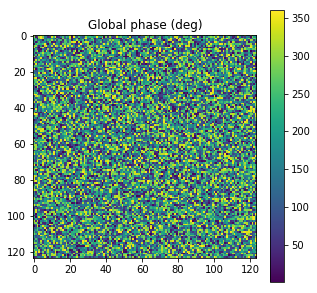

In [87]:
# Global phase
M = Mueller()
phase = np.random.rand(124, 124) * 360 * degrees
M.from_matrix(np.random.rand(4,4,124,124), global_phase=phase)
_ = M.parameters.global_phase(draw=True)

The mean transmission of M is:
The mean value is 0.498701109940417 +- 0.28823574764650944



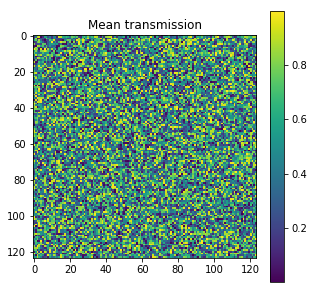

In [88]:
# mean_transmission
M = Mueller()
phase = np.random.rand(124, 124) * 360 * degrees
M.from_matrix(np.random.rand(4,4,124,124), global_phase=phase)
_ = M.parameters.mean_transmission(draw=True)

The diattenuation vector of M is:
The mean value of param D[0] is 0.5014394616546795 +- 0.28817030025684787
The mean value of param D[1] is 0.5004982971977355 +- 0.28884138452909824
The mean value of param D[2] is 0.4995916201615299 +- 0.2899902325560972



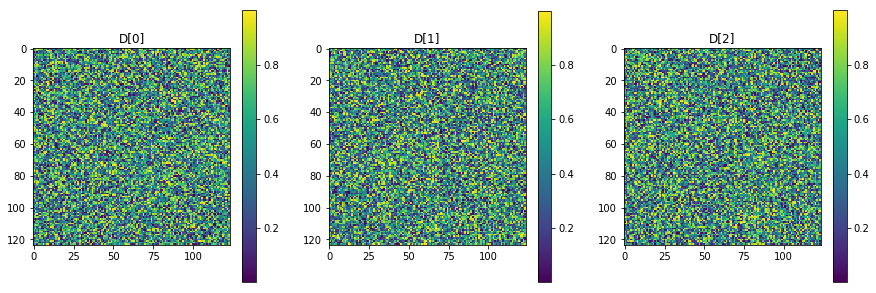

In [89]:
# diattenuation_vector
M = Mueller()
mat = np.random.rand(4, 4, 124, 124)
mat[0,0,:] = 1
M.from_matrix(mat)
_ = M.parameters.diattenuation_vector(draw=True)

The polarizance vector of M is:
The mean value of param P[0] is 0.5000239268174054 +- 0.2909052616802895
The mean value of param P[1] is 0.5006950084222306 +- 0.28891898945015193
The mean value of param P[2] is 0.502779002217751 +- 0.288723781388775



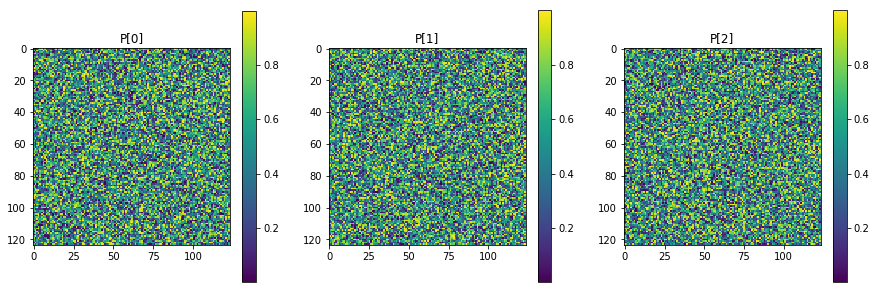

In [90]:
# polarizance_vector
M = Mueller()
mat = np.random.rand(4, 4, 124, 124)
mat[0,0,:] = 1
M.from_matrix(mat)
_ = M.parameters.polarizance_vector(draw=True)

The small matrix of M is:
The mean value of param m[0,0] is 0.5005837866799318 +- 0.28921642436812045
The mean value of param m[0,1] is 0.4979748077371142 +- 0.28773336729375826
The mean value of param m[0,2] is 0.49870517858011726 +- 0.2892204662921762
The mean value of param m[1,0] is 0.4991896014291891 +- 0.2888702686632135
The mean value of param m[1,1] is 0.5006843555204558 +- 0.2891888095022231
The mean value of param m[1,2] is 0.49793363147958003 +- 0.28889337431009066
The mean value of param m[2,0] is 0.4985721689280271 +- 0.2886001420095202
The mean value of param m[2,1] is 0.49867700974097146 +- 0.28747398873485086
The mean value of param m[2,2] is 0.4970395872279566 +- 0.28735080804636465



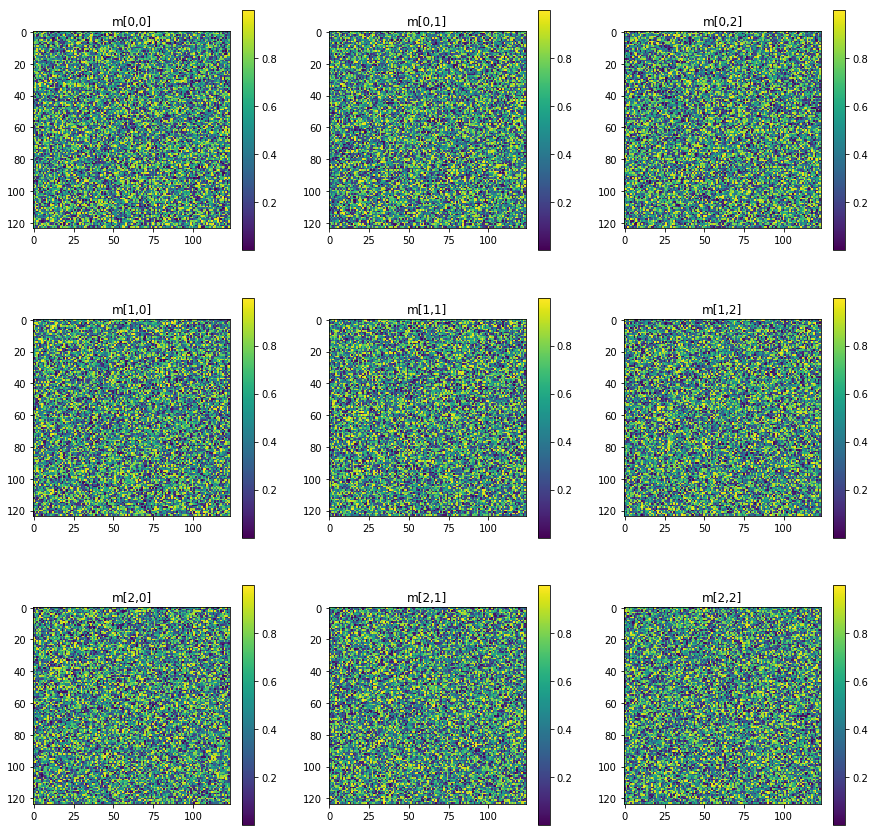

In [91]:
# small_matrix
M = Mueller()
mat = np.random.rand(4, 4, 124, 124)
mat[0,0,:] = 1
M.from_matrix(mat)
_ = M.parameters.small_matrix(draw=True)

The block components of M are:
  - M_00 of M is:
The mean value is 1.0 +- 0.0

  - Diattenuation vector of M is:
The mean value of param D[0] is 0.5019335366843258 +- 0.28731053851648186
The mean value of param D[1] is 0.4998714643743743 +- 0.2891348323099907
The mean value of param D[2] is 0.5011104844098576 +- 0.2885404597858103

  - Polarizance vector of M is:
The mean value of param P[0] is 0.49817048574046224 +- 0.2877105831501293
The mean value of param P[1] is 0.5009414072592498 +- 0.2883010750837728
The mean value of param P[2] is 0.4990371276829877 +- 0.2891559663510311

  - Small matrix of M is:
The mean value of param m[0,0] is 0.5010731352459995 +- 0.2902200980557269
The mean value of param m[0,1] is 0.49859626656149625 +- 0.2879400576580529
The mean value of param m[0,2] is 0.4999975226260709 +- 0.2889654288783837
The mean value of param m[1,0] is 0.4992057967244408 +- 0.28762282697962616
The mean value of param m[1,1] is 0.499408355509213 +- 0.2908068171129029
The mean va

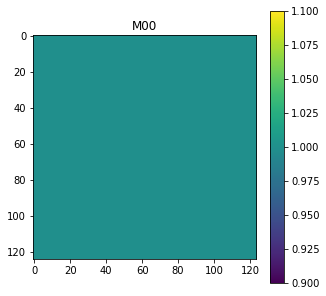

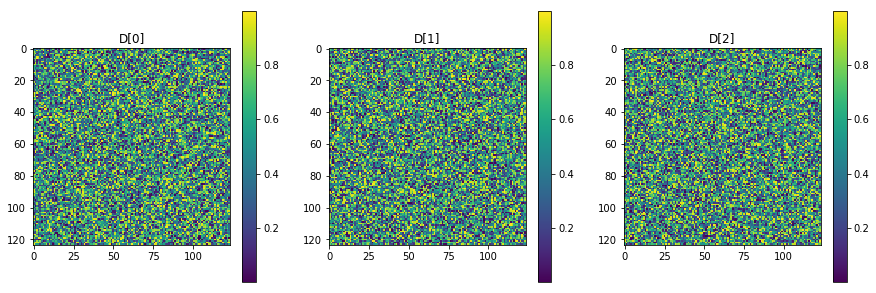

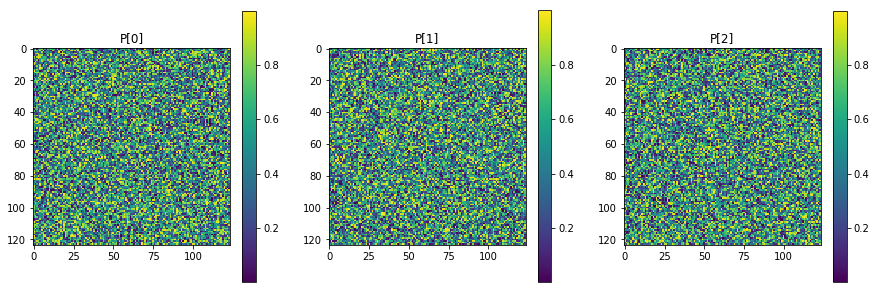

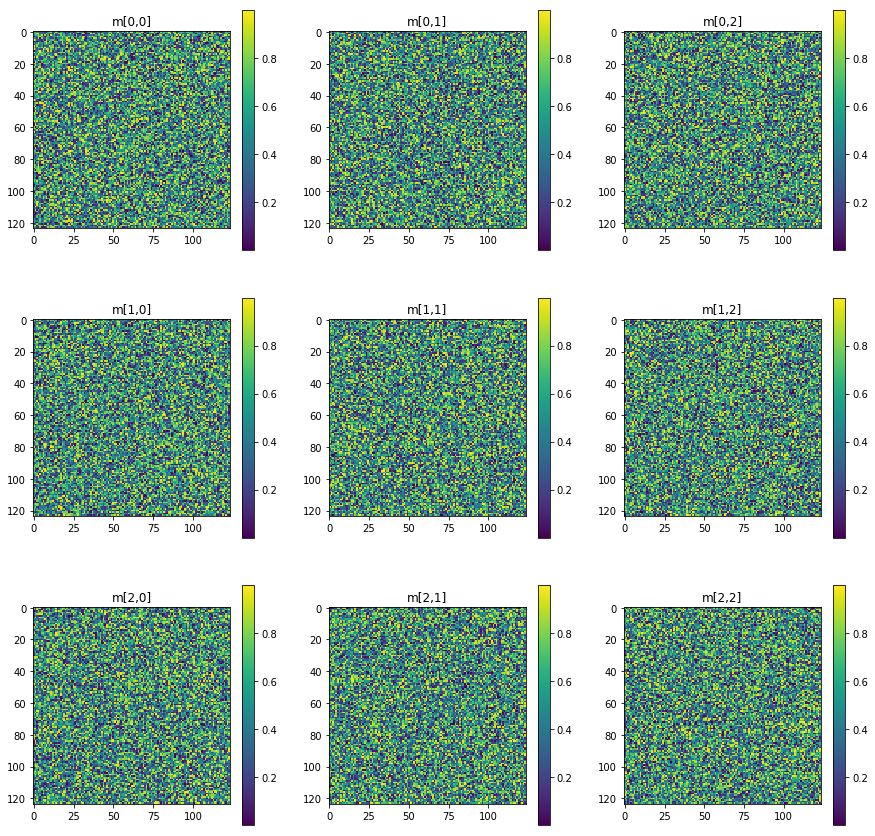

In [92]:
# blocks
M = Mueller()
mat = np.random.rand(4, 4, 124, 124)
mat[0,0,:] = 1
M.from_matrix(mat)
_ = M.parameters.blocks(draw=True)

M = 
[+0.530 +0.280 +0.000 +0.000]   
[+0.280 +0.530 +0.000 +0.000]   
[+0.000 +0.000 +0.450 +0.000]   
[+0.000 +0.000 +0.000 +0.450]   

The inhomogeneity parameter of M is:
0.0

The inhomogeneity parameter of M is:
The mean value is 0.0 +- 0.0



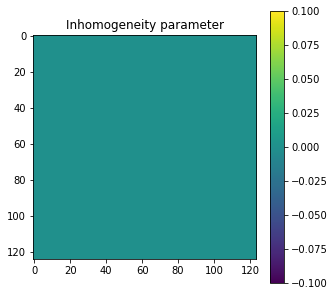

In [93]:
# inhomogeneity
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.5)
print(M)
_ = M.parameters.inhomogeneity(verbose=True)

M = Mueller()
phase = np.random.rand(124, 124) * 360 * degrees
M.diattenuator_linear(p1=np.random.rand(124,124), p2=np.random.rand(124,124), global_phase=phase)
_ = M.parameters.inhomogeneity(draw=True)

The diattenuation of M is:
0.11724137931034477

The diattenuation of M is:
The mean value is 0.5731193433798303 +- 0.3200307360801443



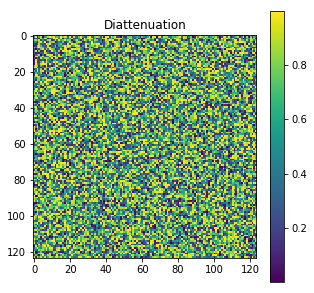

In [94]:
# diattenuation
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.diattenuation(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.diattenuation(draw=True)

The linear diattenuation of M is:
0.11724137931034477

The linear diattenuation of M is:
The mean value is 0.5661745618468962 +- 0.31968949595543766



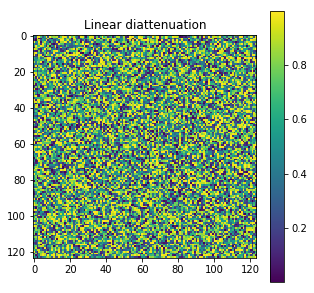

In [95]:
# diattenuation_linear
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.diattenuation_linear(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.diattenuation_linear(draw=True)

The circular diattenuation of M is:
0.0

The circular diattenuation of M is:
The mean value is 0.0 +- 0.0



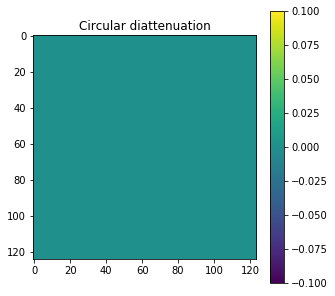

In [96]:
# diattenuation_circular
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.diattenuation_circular(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.diattenuation_circular(draw=True)

The polarizance of M is:
0.11724137931034477

The polarizance of M is:
The mean value is 0.5665810991178606 +- 0.3228916552587768



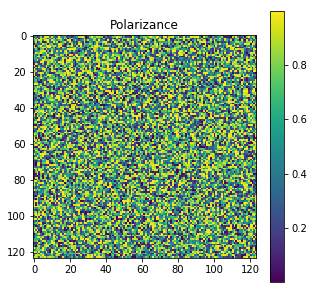

In [97]:
# polarizance
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.polarizance(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.polarizance(draw=True)

The linear polarizance of M is:
0.11724137931034477

The linear polarizance of M is:
The mean value is 0.5755845593625486 +- 0.32025198964067975



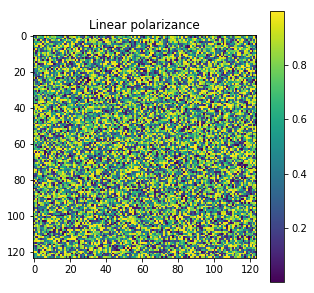

In [98]:
# polarizance_linear
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.polarizance_linear(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.polarizance_linear(draw=True)

The circular polarizance of M is:
0.0

The circular polarizance of M is:
The mean value is 0.0 +- 0.0



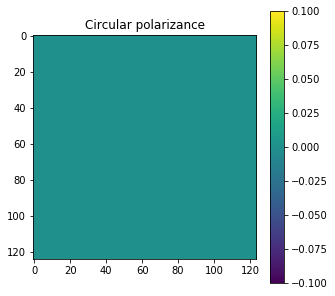

In [100]:
# polarizance_circular
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.polarizance_circular(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.polarizance_circular(draw=True)

The degree of polarizance of M is:
0.11724137931034477

The degree of polarizance of M is:
The mean value is 0.5725285375560604 +- 0.3219190527983805



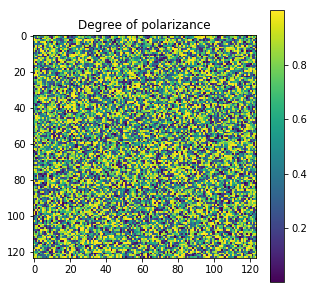

In [101]:
# degree_polarizance
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.degree_polarizance(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.degree_polarizance(draw=True)

The degree of spherical purity of M is:
0.9954076079601455

The degree of spherical purity of M is:
The mean value is 0.8312976774746103 +- 0.14800911241487527



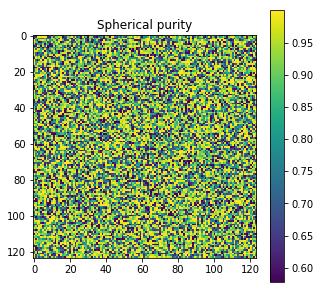

In [124]:
# spheric_purity
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.spheric_purity(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.spheric_purity(draw=True)

The retardance of M is:
1.5707963267948966

The retardance of M is:
The mean value is 1.566304131282376 +- 0.9068109356182094

1.5899083281088116e-12


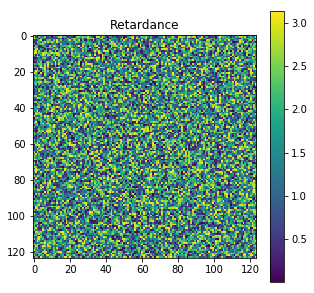

In [125]:
# retardance
M = Mueller()
M.retarder_linear(R=90*degrees)
_ = M.parameters.retardance(verbose=True)

M = Mueller()
N = 124
R = np.random.rand(N,N) * 180*degrees
M.retarder_linear(R=R)
_ = M.parameters.retardance(draw=True)
print(np.linalg.norm(R-_))

The eigenvalues of M are:
  v1
0.81
  v2
0.25
  v3
0.45
  v4
0.45

The eigenvectors of M are:
  e1 I
[0.7071]
  e1 Q
[0.7071]
  e1 U
[0.]
  e1 V
[0.]
  e2 I
[-0.7071]
  e2 Q
[0.7071]
  e2 U
[0.]
  e2 V
[0.]
  e3 I
[0.]
  e3 Q
[0.]
  e3 U
[1.]
  e3 V
[0.]
  e4 I
[0.]
  e4 Q
[0.]
  e4 U
[0.]
  e4 V
[1.]

The eigenvalues of M are:
The mean value of param v1 is 0.6541935483870969 +- 0.25095011962344593
The mean value of param v2 is 0.40580645161290324 +- 0.2509501196234461
The mean value of param v3 is 0.45000000000000007 +- 9.407368667087378e-17
The mean value of param v4 is 0.4500000000000002 +- 1.6653345369377348e-16

The eigenvectors of M are:
The mean value of param e1 I is 0.1972872067696598 +- 0.6790270672403461
The mean value of param e1 Q is 0.32022115185354433 +- 0.31948389763995
The mean value of param e1 U is 0.38616181557311974 +- 0.38244934991139284
The mean value of param e1 V is 0.0 +- 0.0
The mean value of param e2 I is 0.3989892321523469 +- 0.5837872837142658
The mean val

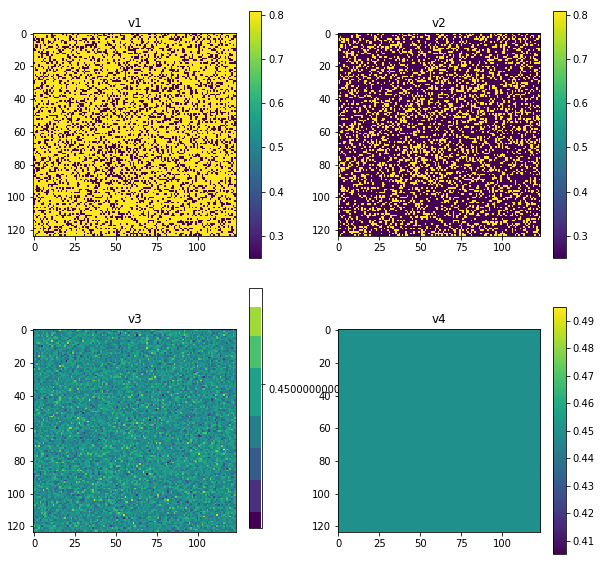

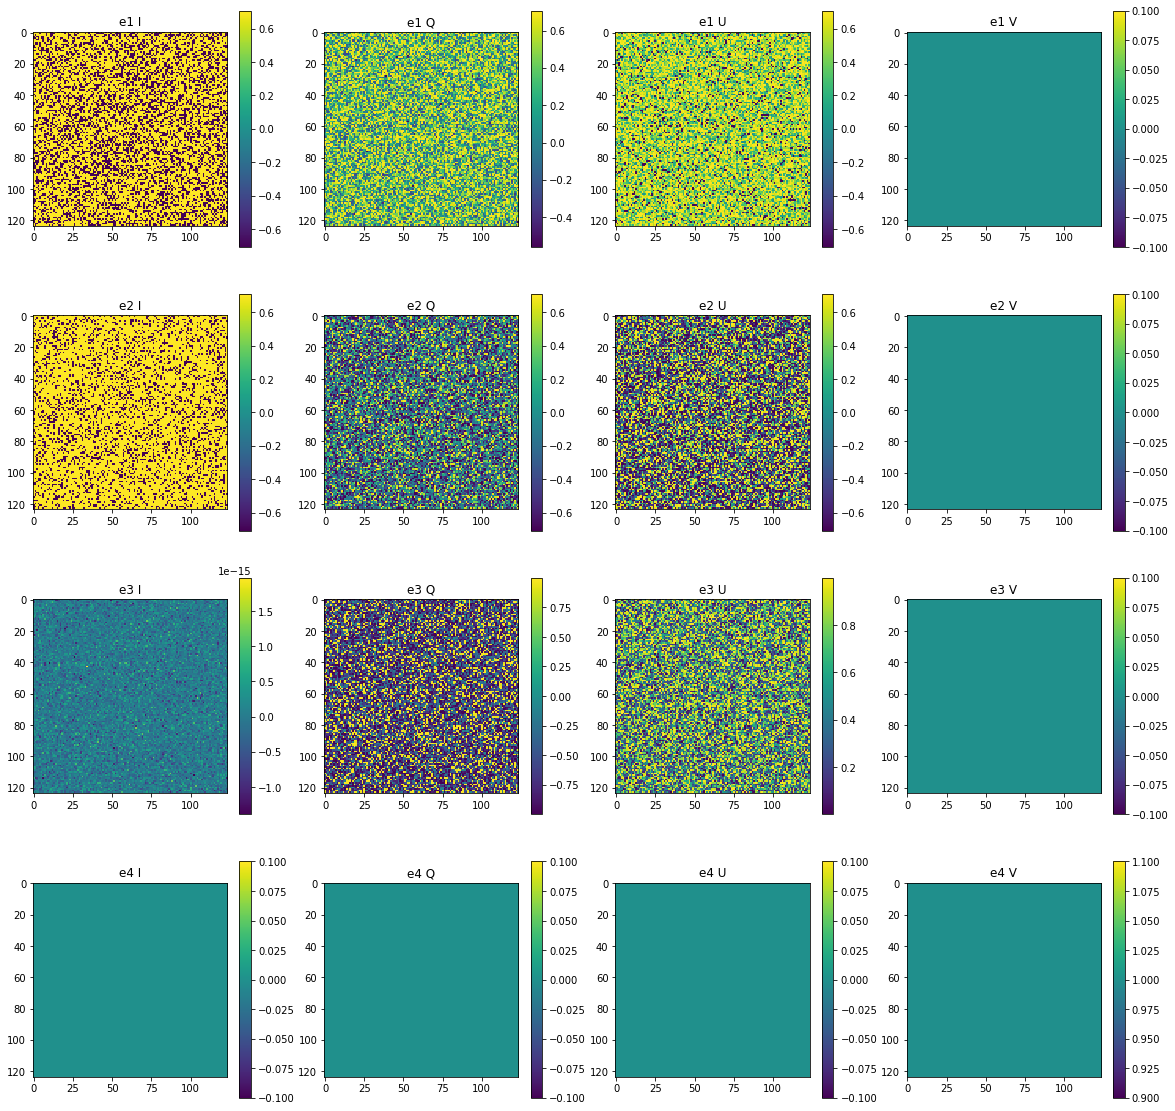

In [126]:
# eig
M = Mueller()
M.diattenuator_linear(0.9,0.5)
val, vect = M.parameters.eig(verbose=True)

M = Mueller()
N=124
angles = np.random.rand(N,N)
M.diattenuator_linear(0.9,0.5, azimuth=angles)
val, vect = M.parameters.eig(draw=True)
for elem in vect:
    print(elem.shape)

In [127]:
# eig
M = Mueller()
M.diattenuator_linear(0.9,0.5)
val, vect = M.parameters.eig(values_as_matrix=True, vectors_as_matrix=True)
print(val.shape, vect.shape)

M = Mueller()
N=124
angles = np.random.rand(N,N)
M.diattenuator_linear(0.9,0.5, azimuth=angles)
val, vect = M.parameters.eig(values_as_matrix=True, vectors_as_matrix=True)
print(val.shape, vect.shape)

(4, 1) (4, 4, 1)
(4, 124, 124) (4, 4, 124, 124)


The eigenvalues of M are:
  v1
0.81
  v2
0.25
  v3
0.45
  v4
0.45

(0.81, 0.25, 0.45, 0.45)
The eigenvalues of M are:
The mean value of param v1 is 0.6588553590010406 +- 0.24858860886354572
The mean value of param v2 is 0.40114464099895947 +- 0.24858860886354586
The mean value of param v3 is 0.45000000000000007 +- 9.419716535683955e-17
The mean value of param v4 is 0.4500000000000002 +- 1.6653345369377348e-16



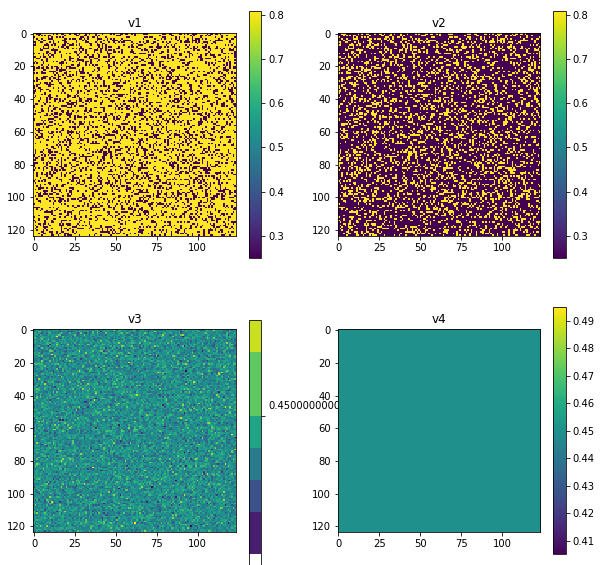

In [128]:
# eigenvalues
M = Mueller()
M.diattenuator_linear(0.9,0.5)
val = M.parameters.eigenvalues(verbose=True)
print(val)

M = Mueller()
N=124
angles = np.random.rand(N,N)
M.diattenuator_linear(0.9,0.5, azimuth=angles)
val = M.parameters.eigenvalues(draw=True)

The eigenvectors of M are:
  e1 I
[0.7071]
  e1 Q
[0.7071]
  e1 U
[0.]
  e1 V
[0.]
  e2 I
[-0.7071]
  e2 Q
[0.7071]
  e2 U
[0.]
  e2 V
[0.]
  e3 I
[0.]
  e3 Q
[0.]
  e3 U
[1.]
  e3 V
[0.]
  e4 I
[0.]
  e4 Q
[0.]
  e4 U
[0.]
  e4 V
[1.]

The eigenvectors of M are:
The mean value of param e1 I is 0.2035415331381152 +- 0.6771785911321958
The mean value of param e1 Q is 0.3130226317640285 +- 0.3202484448093385
The mean value of param e1 U is 0.39016094456474754 +- 0.3837084869234264
The mean value of param e1 V is 0.0 +- 0.0
The mean value of param e2 I is 0.395126265865948 +- 0.5864087601859578
The mean value of param e2 Q is -0.10968498559737602 +- 0.43417903949152364
The mean value of param e2 U is -0.07051249583507908 +- 0.5426654158243636
The mean value of param e2 V is 0.0 +- 0.0
The mean value of param e3 I is -1.7091928119595262e-18 +- 3.124513225492447e-16
The mean value of param e3 Q is -0.29597141488629397 +- 0.7150639501272931
The mean value of param e3 U is 0.541439502025018 +

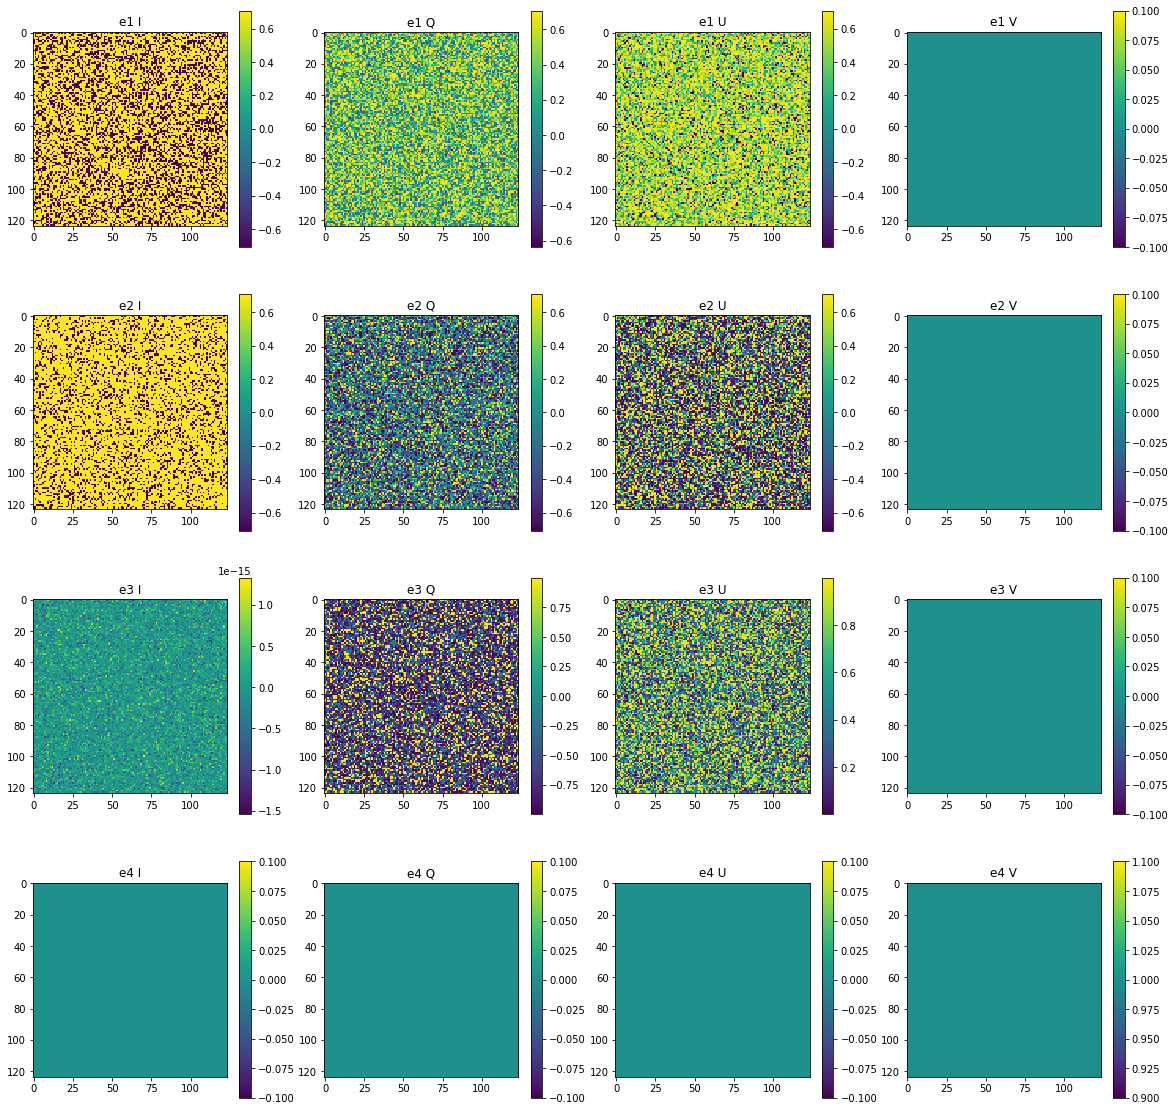

In [132]:
# eigenvectors
M = Mueller()
M.diattenuator_linear(0.9,0.5)
val = M.parameters.eigenvectors(verbose=True)

M = Mueller()
N=124
angles = np.random.rand(N,N)
M.diattenuator_linear(0.9,0.5, azimuth=angles)
vect = M.parameters.eigenvectors(draw=True)

In [133]:
a = np.random.rand(5,2,2)
print(a)
b = np.array([a[:,0,0], a[:,1,0]])
print(b.shape)
c = a[:,0:,0]
print(c.shape)

[[[0.9251 0.9526]
  [0.9522 0.9253]]

 [[0.6343 0.4538]
  [0.358  0.7158]]

 [[0.4518 0.3551]
  [0.4258 0.7233]]

 [[0.5955 0.5779]
  [0.77   0.9873]]

 [[0.0919 0.3136]
  [0.7578 0.911 ]]]
(2, 5)
(5, 2)


In [134]:
M = Mueller()
M.diattenuator_linear(0.9,0.5)
vect = M.parameters.eigenvectors(vectors_as_matrix=True)
print(vect.shape)

M = Mueller()
N=124
angles = np.random.rand(N,N)
M.diattenuator_linear(0.9,0.5, azimuth=angles)
vect = M.parameters.eigenvectors(vectors_as_matrix=True)
print(vect.shape)

(4, 4, 1)
(4, 4, 124, 124)


The eigenstates of M are:
  S1 I
1.0
  S1 Q
-1.0
  S1 U
0.0
  S1 V
-0.0
  S2 I
1.0
  S2 Q
1.0
  S2 U
0.0
  S2 V
-0.0

The eigenstates of M are:
The mean value of param S1 I is 1.0 +- 1.5038533314454545e-16
The mean value of param S1 Q is -0.45780609952259266 +- 0.44602955639871955
The mean value of param S1 U is -0.7050821625230776 +- 0.30713247003606053
The mean value of param S1 V is 0.0 +- 0.0
The mean value of param S2 I is 1.0 +- 1.5038533314454545e-16
The mean value of param S2 Q is 0.45780609952259266 +- 0.44602955639871955
The mean value of param S2 U is 0.7050821625230776 +- 0.30713247003606053
The mean value of param S2 V is 0.0 +- 0.0



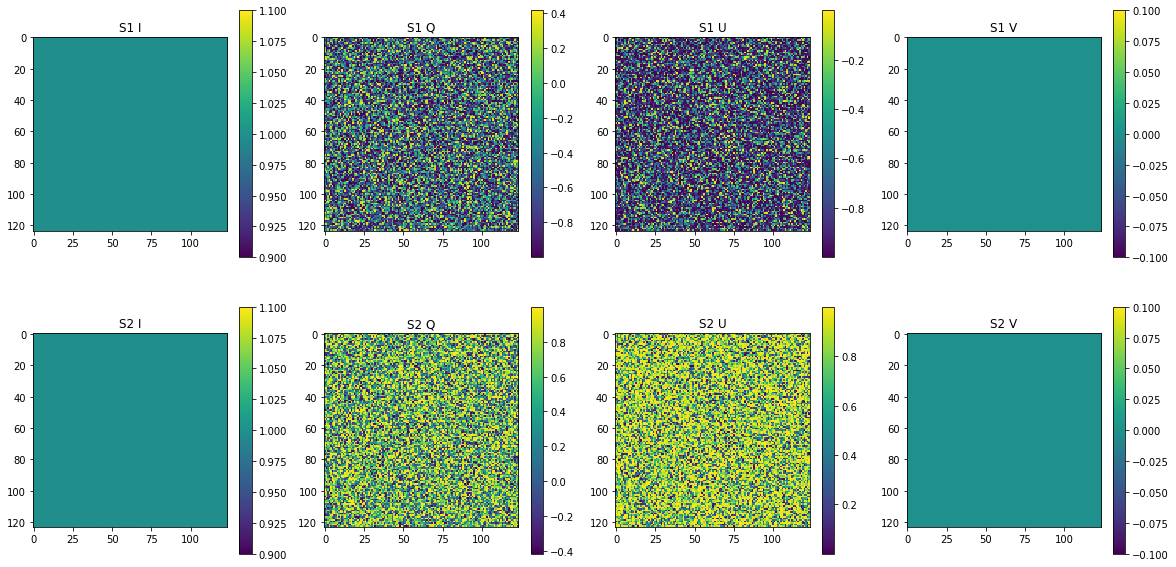

In [135]:
# eigenstates
M = Mueller()
M.diattenuator_linear(0.9,0.5)
val = M.parameters.eigenstates(verbose=True)

M = Mueller()
N=124
angles = np.random.rand(N,N)
M.diattenuator_linear(0.9,0.5, azimuth=angles)
vect = M.parameters.eigenstates(draw=True)

The transmissions of M are:
  Maximum
0.8099999999999999
  Minimum
0.25

The transmissions of M are:
The mean value of param Maximum is 0.81 +- 1.0361228822224153e-16
The mean value of param Minimum is 0.25 +- 2.5005517448362713e-17



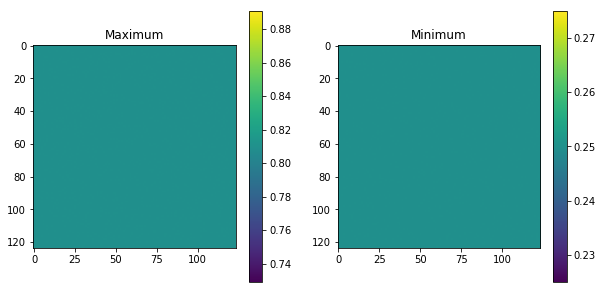

In [136]:
# eigenstates
M = Mueller()
M.diattenuator_linear(0.9,0.5)
val = M.parameters.transmissions(verbose=True)

M = Mueller()
N=124
angles = np.random.rand(N,N)
M.diattenuator_linear(0.9,0.5, azimuth=angles)
vect = M.parameters.transmissions(draw=True)

The retardance vector (norm) components components of M are:
  r0
[-1.]
  r1
[0.]
  r2
[-0.]

The retardance vector (norm) components components of M are:
The mean value of param r0 is -0.001961386530382861 +- 0.7094074870315443
The mean value of param r1 is 0.006383628849025785 +- 0.4986650471414289
The mean value of param r2 is 0.0008643675823703338 +- 0.49802494236464184



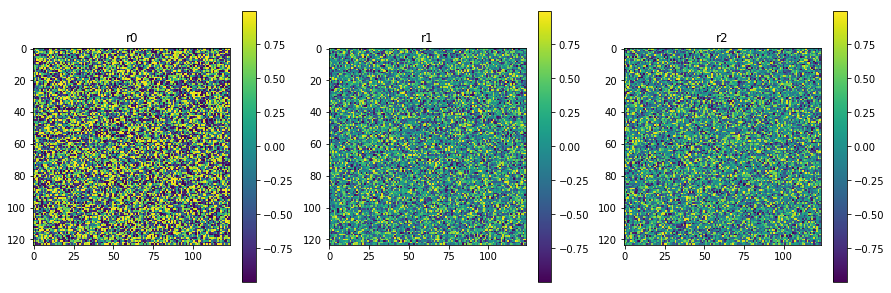

In [139]:
# retardance_vector
M = Mueller()
M.half_waveplate()
_ = M.parameters.retardance_vector(verbose=True)

N = 124
alpha = np.random.rand(N,N) * 90*degrees
delay = np.random.rand(N,N) * 360*degrees
M.retarder_charac_angles(R=90*degrees, alpha=alpha, delay=delay)
_ = M.parameters.retardance_vector(draw=True)

The degree of polarimetric purity of M is:
1.0

The degree of polarimetric purity of M is:
The mean value is 1.0 +- 7.385343457685228e-17



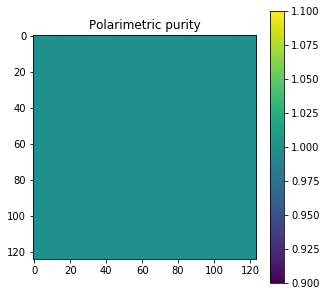

In [140]:
# polarimetric_purity
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.polarimetric_purity(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.polarimetric_purity(draw=True)

The depolarization index of M is:
0.0

The depolarization index of M is:
The mean value is nan +- nan



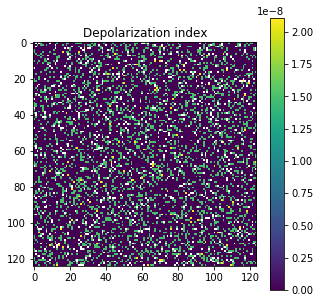

In [143]:
# depolarization_index
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.depolarization_index(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.depolarization_index(draw=True)

The polarimetric purity indices of M are:
  P1
0.9999999999999999
  P2
0.9999999999999999
  P3
0.9999999999999999

The polarimetric purity indices of M are:
The mean value of param P1 is 1.0 +- 2.4520417589156626e-16
The mean value of param P2 is 1.0 +- 2.47864003032153e-16
The mean value of param P3 is 1.0 +- 2.478187204338728e-16



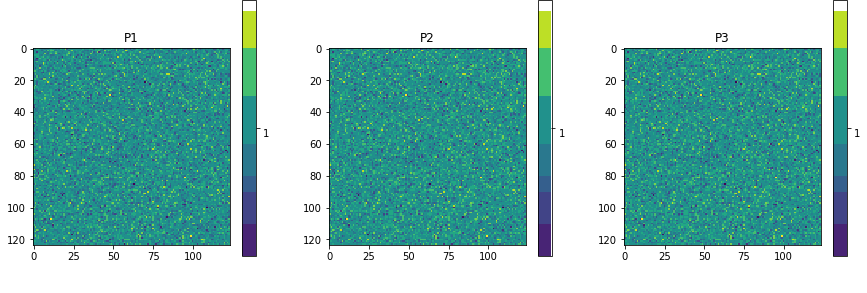

In [145]:
# polarimetric_purity_indices
M = Mueller()
M.diattenuator_linear(p1=0.9, p2=0.8)
_ = M.parameters.polarimetric_purity_indices(verbose=True)

M = Mueller()
N = 124
p1 = np.random.rand(N,N)
p2 = np.random.rand(N,N)
# print(p1, '\n', p2)
M.diattenuator_linear(p1=p1, p2=p2)
_ = M.parameters.polarimetric_purity_indices(draw=True)

In [146]:
# get
M = Mueller()
M.from_matrix(np.random.rand(4,4,5,6))
mat = M.get()
print(mat.shape)

(4, 4, 5, 6)
(4, 4, 5, 6)


## Checks

M is physically realizable:
False

M is physically realizable:
The mean value is 0.006944444444444444 +- 0.08304347738264861



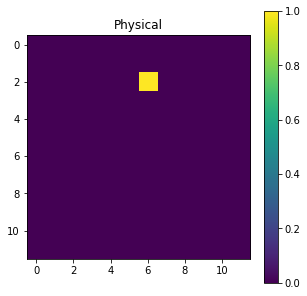

In [147]:
# is_physical
M = Mueller()
M.diattenuator_linear()
_ = M.checks.is_physical(verbose=True)

N = 12
p2 = np.random.rand(N,N)
M.diattenuator_linear(p2=p2)
_ = M.checks.is_physical(draw=True)

M is physically realizable:
The mean value of param Physical is 0.006944444444444444 +- 0.08304347738264861
The mean value of param Real elements is 1.0 +- 0.0
The mean value of param M00 >= 0 is 1.0 +- 0.0
The mean value of param M00 <= 1 is 1.0 +- 0.0
The mean value of param abs(Mij) <= M00 is 0.5277777777777778 +- 0.4992277987669841
The mean value of param D <= 1 is 1.0 +- 0.0
The mean value of param P <= 1 is 1.0 +- 0.0
The mean value of param Tmax <= 1 is 1.0 +- 0.0
The mean value of param Recip Tmax <= 1 is 1.0 +- 0.0
The mean value of param Tr(M*M^T) <= 4*M00^2 is 0.006944444444444444 +- 0.08304347738264861
The mean value of param m cond (D) is 1.0 +- 0.0
The mean value of param m cond (P) is 1.0 +- 0.0
The mean value of param Real eigenvalues is 1.0 +- 0.0
The mean value of param Eigenvalues >= 0 is 0.013888888888888888 +- 0.11702985796078279
The mean value of param Eigenvalues <= 1 is 1.0 +- 0.0



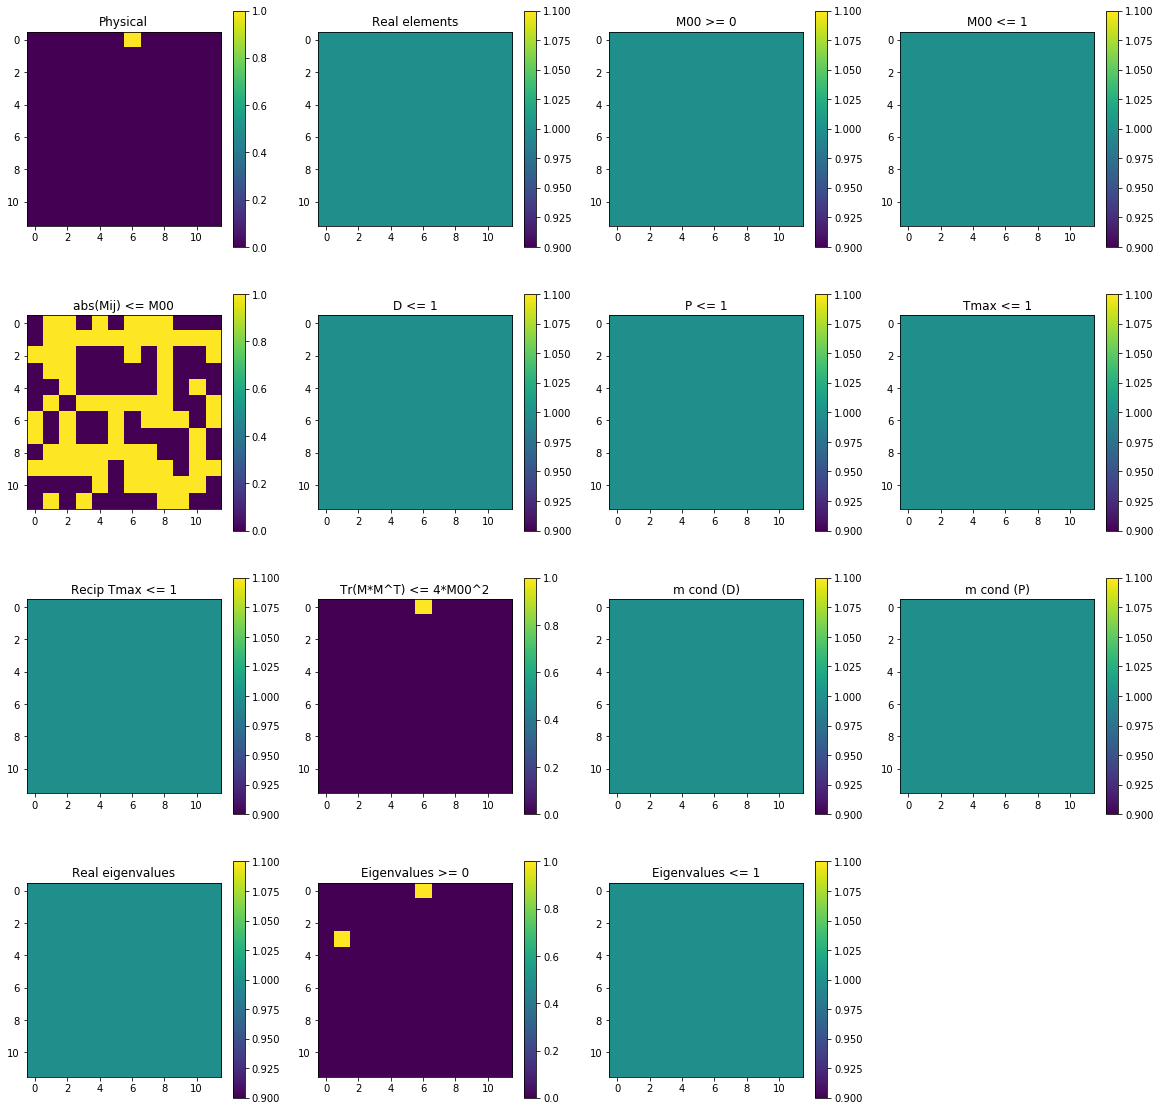

In [148]:
M = Mueller()
N = 12
p2 = np.random.rand(N,N)
M.diattenuator_linear(p2=p2)
_ = M.checks.is_physical(draw=True, all_info=True)

M is pure (non-depolarizing):
True

M is pure (non-depolarizing):
The mean value is 1.0 +- 0.0



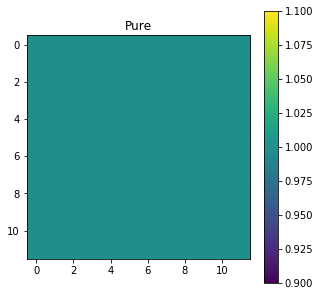

In [149]:
# is_non_depolarizing
M = Mueller()
M.diattenuator_linear()
_ = M.checks.is_non_depolarizing(verbose=True)

N = 12
p2 = np.random.rand(N,N)
M.diattenuator_linear(p2=p2)
_ = M.checks.is_non_depolarizing(draw=True)

M is homogeneous:
True

M is homogeneous:
The mean value is 1.0 +- 0.0



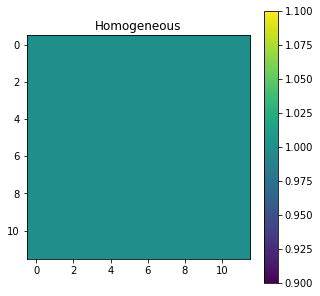

In [150]:
# is_homogeneous
M = Mueller()
M.diattenuator_linear()
_ = M.checks.is_homogeneous(verbose=True)

N = 12
p2 = np.random.rand(N,N)
M.diattenuator_linear(p2=p2)
_ = M.checks.is_homogeneous(draw=True)

M is a retarder:
True

M is a retarder:
The mean value is 0.0 +- 0.0



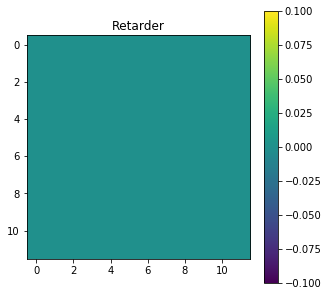

In [154]:
# is_retarder
M = Mueller()
M.retarder_linear(R=30*degrees)
_ = M.checks.is_retarder(verbose=True)

N = 12
p2 = np.random.rand(N,N)
M.diattenuator_linear(p2=p2)
_ = M.checks.is_retarder(draw=True)

M is a diattenuator:
[False]

M is a diattenuator:
The mean value is 0.0 +- 0.0



d:\codigo_ucm\py_pol\py_pol\mueller.py:5400: RuntimeWarning: invalid value encountered in true_divide
  (1, Dv[0, :] / par, Dv[1, :] / par, Dv[2, :] / par))
d:\codigo_ucm\py_pol\py_pol\mueller.py:5402: RuntimeWarning: invalid value encountered in true_divide
  (1, -Dv[0, :] / par, -Dv[1, :] / par, -Dv[2, :] / par))


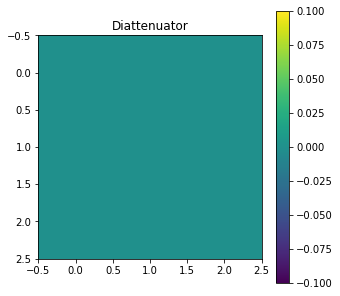

In [160]:
# is_diattenuator
M = Mueller()
M.retarder_linear(R=30*degrees)
_ = M.checks.is_diattenuator(verbose=True)

N = 3
p2 = np.random.rand(N,N)
M.diattenuator_linear(p2=p2)
_ = M.checks.is_diattenuator(draw=True)

M is singular:
False

M is singular:
The mean value is 0.1111111111111111 +- 0.31426968052735443



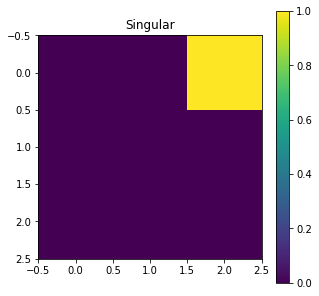

In [161]:
# is_singular
M = Mueller()
M.retarder_linear(R=30*degrees)
_ = M.checks.is_singular(verbose=True)

N = 3
p2 = np.random.rand(N,N)
M.diattenuator_linear(p2=p2)
_ = M.checks.is_singular(draw=True)

## Analysis

In [162]:
# filter_purify_number
M = np.array([[1, -0.0229, 0.0027, 0.0058], [-0.0186, 0.9956, -0.0361, 0.0318], [-0.0129, 0.0392, 0.2207, -0.9656], [0.0014, 0.028, 0.9706, 0.2231]])
M1 = Mueller()
M1.from_matrix(M)
print(M1)
# H = M1.covariance_matrix(keep=True)
# print(H)
# M_test = Mueller()
# M_test.from_covariance(H)
# print(np.linalg.norm(M1.M-M_test.M))
M2 = M1.analysis.filter_purify_number(Neig=3, keep=True)
print(M2)
# H2 = M2.covariance_matrix(keep=True)
# l = H2.parameters.eigenvalues(verbose=True)

M = 
[+1.000 -0.023 +0.003 +0.006]   
[-0.019 +0.996 -0.036 +0.032]   
[-0.013 +0.039 +0.221 -0.966]   
[+0.001 +0.028 +0.971 +0.223]   

Covariant of M = 
[+0.996 -0.021 +0.001 +0.009]   
[-0.021 +0.995 -0.036 +0.032]   
[-0.009 +0.039 +0.222 -0.970]   
[+0.002 +0.028 +0.970 +0.223]   



d:\codigo_ucm\py_pol\py_pol\mueller.py:1466: ComplexWarning: Casting complex values to real discards the imaginary part
  components += [np.array(elem.parameters.trace(shape=False), dtype=float)]


In [163]:
M = np.random.rand(4,4,5,3)
M1 = Mueller()
M1.from_matrix(M)
print(M1.shape)
M2 = M1.analysis.filter_purify_number(Neig=3, keep=True)
print(M2.shape)

[5, 3]
[5, 3]


In [164]:
# filter_purify_threshold
M = np.array([[1, -0.0229, 0.0027, 0.0058], [-0.0186, 0.9956, -0.0361, 0.0318], [-0.0129, 0.0392, 0.2207, -0.9656], [0.0014, 0.028, 0.9706, 0.2231]])
M1 = Mueller()
M1.from_matrix(M)
print(M1)
M2 = M1.analysis.filter_purify_threshold(threshold=0.01, keep=True)
print(M2)

M = 
[+1.000 -0.023 +0.003 +0.006]   
[-0.019 +0.996 -0.036 +0.032]   
[-0.013 +0.039 +0.221 -0.966]   
[+0.001 +0.028 +0.971 +0.223]   

Covariant of M = 
[+0.996 -0.021 +0.001 +0.009]   
[-0.021 +0.995 -0.036 +0.032]   
[-0.009 +0.039 +0.222 -0.970]   
[+0.002 +0.028 +0.970 +0.223]   



In [165]:
# filter_physical_conditions
M = np.random.rand(4,4)
M1 = Mueller()
M1.from_matrix(M)
print(M1)
M2 = M1.analysis.filter_physical_conditions(tol=1e-6, keep=True)
print(M2)

M = 
[+0.855 +0.524 +0.449 +0.469]   
[+0.768 +0.671 +0.665 +0.950]   
[+0.371 +0.953 +0.077 +0.872]   
[+0.484 +0.795 +0.743 +0.955]   

M = 
[+0.855 +0.716 +0.614 +0.641]   
[+0.855 +0.671 +0.665 +0.855]   
[+0.507 +0.855 +0.077 +0.855]   
[+0.661 +0.795 +0.743 +0.855]   



In [166]:
# filter_physical_conditions
M = np.random.rand(4,4,3,5)
M1 = Mueller()
M1.from_matrix(M)
print(M1.shape)
M2 = M1.analysis.filter_physical_conditions(tol=1e-6, keep=True)
print(M2.shape)

[3, 5]
[3, 5]


In [207]:
# diattenuator
N=1
p1 = np.random.rand(N)/2 + 0.5
p2 = np.random.rand(N)/2
azimuth = np.random.rand(N) * 180*degrees
ellipticity = np.random.rand(N) * 90*degrees - 45*degrees
print(p1, p2, azimuth/degrees, ellipticity/degrees)
M1 = Mueller()
M1.diattenuator_azimuth_ellipticity(p1=p1, p2=p2, azimuth=azimuth, ellipticity=ellipticity)
trans, angles = M1.analysis.diattenuator(verbose =True)

[0.5908] [0.2721] [59.5442] [21.8528]

Analysis of M as diattenuator:

- Transmissions of M are:
  Max. transmission
0.3490410818588709
  Min. transmission
0.07402857450920271
  p1
0.5907969887015936
  p2
0.2720819260980095

- Polarizance vector of M is:
  Alpha
[55.2878]
  Delay
[47.5641]
  Azimuth
[59.5442]
  Ellipticity angle
[21.8528]




Analysis of M as diattenuator:

- Transmissions of M are:
The mean value of param Max. transmission is 0.5749056351936004 +- 0.22968263468776437
The mean value of param Min. transmission is 0.08222963731686259 +- 0.07512974772974967
The mean value of param p1 is 0.7427533989414414 +- 0.15239102189609618
The mean value of param p2 is 0.2465019214908226 +- 0.1465142997055064

- Polarizance vector of M is:
The mean value of param Alpha is 45.02212380153716 +- 15.399957772123265
The mean value of param Delay is 177.8452155932659 +- 98.90626183111007
The mean value of param Azimuth is 92.37404668806546 +- 50.64895478164682
The mean value of param Ellipticity angle is -0.6232635793365224 +- 26.210939634380335



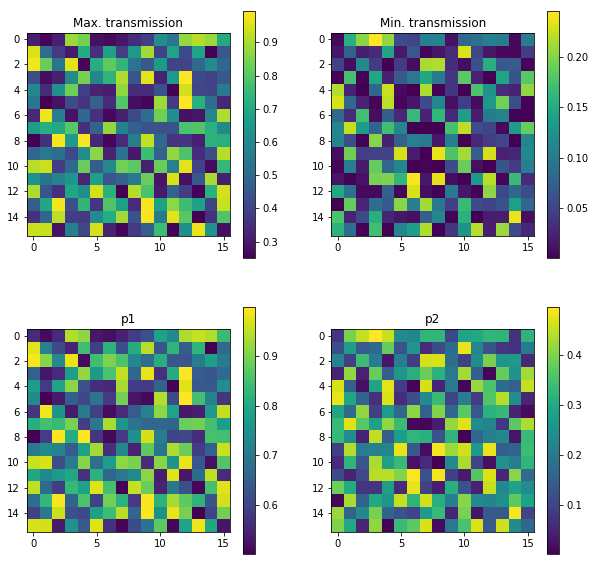

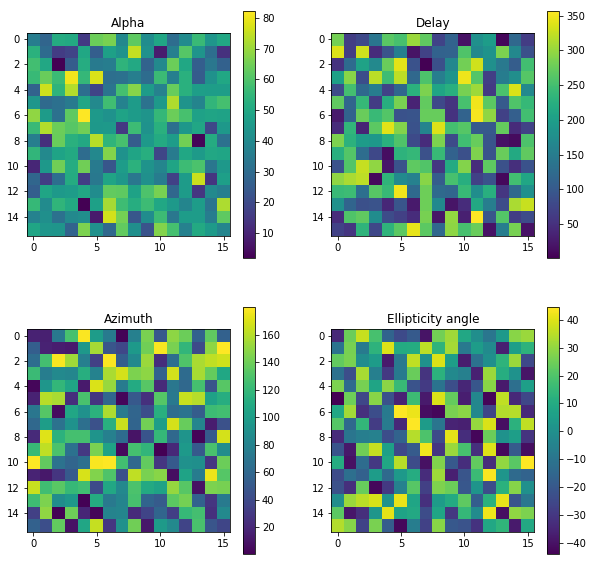

In [218]:
# diattenuator
N=16
p1 = np.random.rand(N,N)/2 + 0.5
p2 = np.random.rand(N,N)/2
azimuth = np.random.rand(N,N) * 180*degrees
ellipticity = np.random.rand(N,N) * 90*degrees - 45*degrees
M1 = Mueller()
M1.diattenuator_azimuth_ellipticity(p1=p1, p2=p2, azimuth=azimuth, ellipticity=ellipticity)
trans, angles = M1.analysis.diattenuator(draw =True)

In [219]:
# polarizer
N=1
p1 = np.random.rand(N)/2 + 0.5
p2 = np.random.rand(N)/2
azimuth = np.random.rand(N) * 180*degrees
ellipticity = np.random.rand(N) * 90*degrees - 45*degrees
print(p1, p2, azimuth/degrees, ellipticity/degrees)
M1 = Mueller()
M1.diattenuator_azimuth_ellipticity(p1=p1, p2=p2, azimuth=azimuth, ellipticity=ellipticity)
trans, angles = M1.analysis.polarizer(verbose =True)

[0.7028] [0.0322] [142.9514] [27.0619]

Analysis of M as polarizer:

- Transmissions of M are:
  Max. transmission
0.4938863206511294
  Min. transmission
0.001038990384802406
  p1
0.7027704608555552
  p2
0.032233373773193616

- Angles of M are:
  Alpha
[40.3798]
  Delay
[124.8211]
  Azimuth
[142.9514]
  Ellipticity angle
[27.0619]




Analysis of M as polarizer:

- Transmissions of M are:
The mean value of param Max. transmission is 0.5956334775931464 +- 0.21456575587635318
The mean value of param Min. transmission is 0.07730817548951299 +- 0.070764854167846
The mean value of param p1 is 0.7585004321188207 +- 0.14251516434649575
The mean value of param p2 is 0.24065827423562822 +- 0.13925433756778335

- Angles of M are:
The mean value of param Alpha is 45.79235834165648 +- 16.658013276821812
The mean value of param Delay is 180.20354081106268 +- 100.98039438274326
The mean value of param Azimuth is 90.79098526862214 +- 50.340833020559245
The mean value of param Ellipticity angle is 2.024827417586167 +- 26.0845677200348



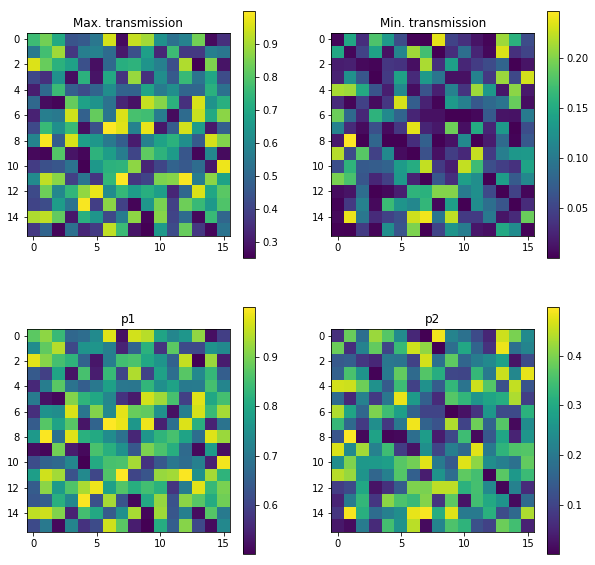

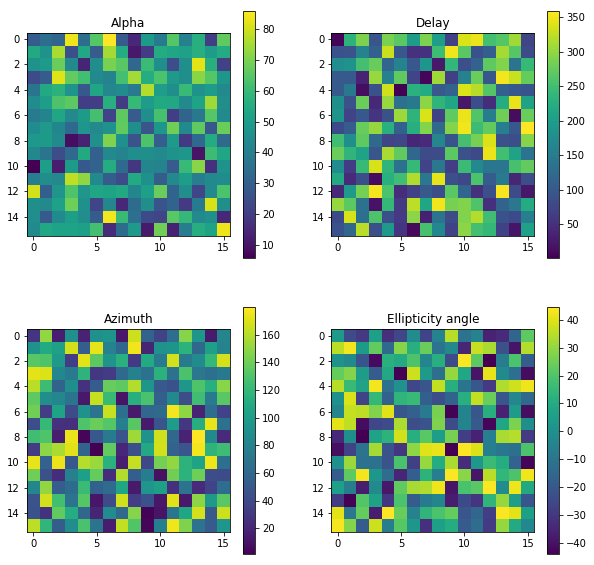

In [220]:
N=16
p1 = np.random.rand(N,N)/2 + 0.5
p2 = np.random.rand(N,N)/2
azimuth = np.random.rand(N,N) * 180*degrees
ellipticity = np.random.rand(N,N) * 90*degrees - 45*degrees
M1 = Mueller()
M1.diattenuator_azimuth_ellipticity(p1=p1, p2=p2, azimuth=azimuth, ellipticity=ellipticity)
trans, angles = M1.analysis.polarizer(draw =True)

In [39]:
# retarder
N=1
R = np.random.rand(N) * 180*degrees
azimuth = np.random.rand(N) * 180*degrees
ellipticity = np.random.rand(N) * 90*degrees - 45*degrees
alpha, delay = azimuth_elipt_2_charac_angles(azimuth, ellipticity)
print(R/degrees, azimuth/degrees, ellipticity/degrees)
M1 = Mueller()
M1.retarder_azimuth_ellipticity(R=R, azimuth=azimuth, ellipticity=ellipticity)
trans, angles = M1.analysis.retarder(verbose =True)
print(R-trans)
print((azimuth-angles[2])/degrees)
print((ellipticity-angles[3])/degrees)
print((alpha-angles[0])/degrees)
print((delay-angles[1])/degrees)

[148.2361] [69.1435] [-44.4402]

Analysis of M as retarder:

- Retardance of M is:
148.23607415656286

- Angles of M are:
  Alpha
[45.4178]
  Delay
[270.745]
  Azimuth
[69.1435]
  Ellipticity angle
[-44.4402]

[0.]
[-0.]
[0.]
[0.]
[0.]



Analysis of M as retarder:

- Retardance of M is:
The mean value is 90.92562172310002 +- 50.45492204166776

- Angles of M are:
The mean value of param Alpha is 47.111202025673386 +- 16.782941892441702
The mean value of param Delay is 179.75639521473727 +- 98.95989840079386
The mean value of param Azimuth is 92.1325587602172 +- 48.52290844185534
The mean value of param Ellipticity angle is -0.5147535165752044 +- 25.320310949789622



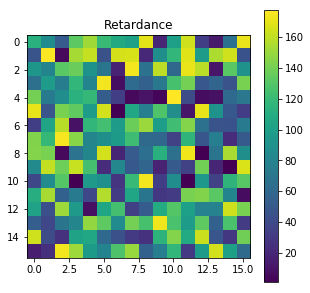

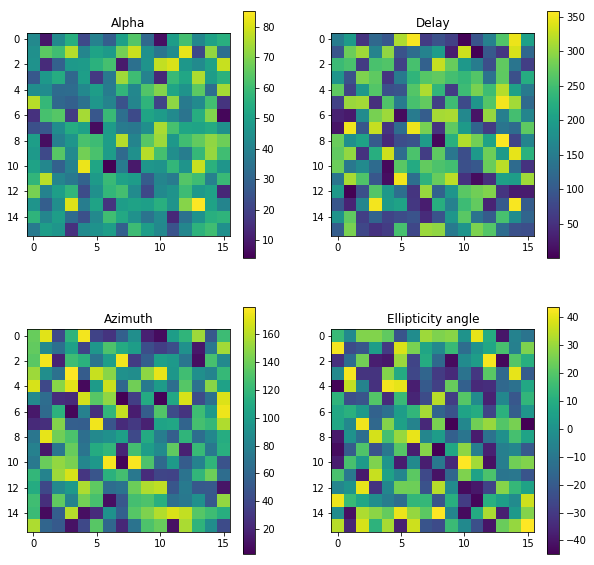

In [229]:
N=16
R = np.random.rand(N,N) * 180*degrees
azimuth = np.random.rand(N,N) * 180*degrees
ellipticity = np.random.rand(N,N) * 90*degrees - 45*degrees
M1 = Mueller()
M1.retarder_azimuth_ellipticity(R=R, azimuth=azimuth, ellipticity=ellipticity)
trans, angles = M1.analysis.retarder(draw =True)

In [9]:
# depolarizer
M = np.random.rand(4, 4) / 3
M[0, 0] = 1
M1 = Mueller()
M1.from_matrix(M)
_ = M1.analysis.depolarizer(verbose=True)


Analysis of M as depolarizer:
- Transmissions of M from diattenuation are:
  Max. transmission
1.3206889776580357
  Min. transmission
0.6793110223419643
  p1
1.1492123292316505
  p2
0.8242032651852116

- Transmissions of M from polarizance are:
  Max. transmission
1.068915038877434
  Min. transmission
0.9310849611225659
  p1
1.0338834745160763
  p2
0.9649274382680627

- Angles of M from diattenuation are:
  Alpha
[35.3429]
  Delay
[14.108]
  Azimuth
[35.0657]
  Ellipticity angle
[6.6495]

- Angles of M from polarizance are:
  Alpha
[36.3561]
  Delay
[78.3792]
  Azimuth
[16.4557]
  Ellipticity angle
[34.6344]

- Depolarization index of M:
0.9175498975403663




Analysis of M as depolarizer:
- Transmissions of M from diattenuation are:
The mean value of param Max. transmission is 1.3271116426068075 +- 0.09109470910212503
The mean value of param Min. transmission is 0.6728883573931926 +- 0.091094709102125
The mean value of param p1 is 1.151306995942701 +- 0.04004801743159123
The mean value of param p2 is 0.8184648463094445 +- 0.054805590489019715


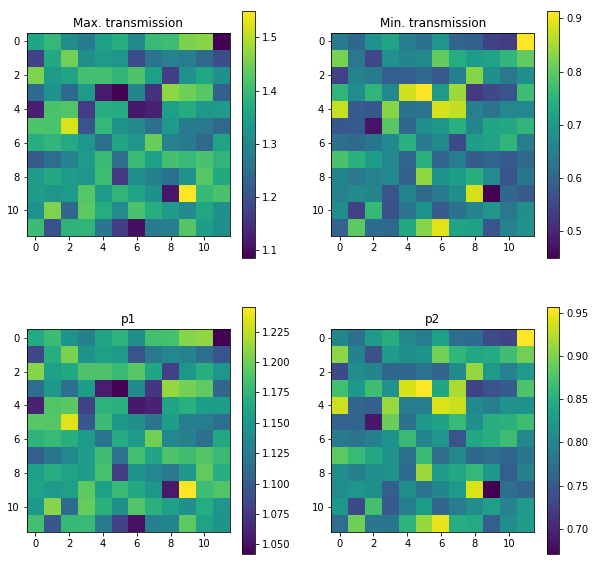


- Transmissions of M from polarizance are:
The mean value of param Max. transmission is 1.3126476435326109 +- 0.0992628936342465
The mean value of param Min. transmission is 0.6873523564673891 +- 0.0992628936342465
The mean value of param p1 is 1.1448765749914855 +- 0.0436494165868968
The mean value of param p2 is 0.8269180322528901 +- 0.059656721351390246


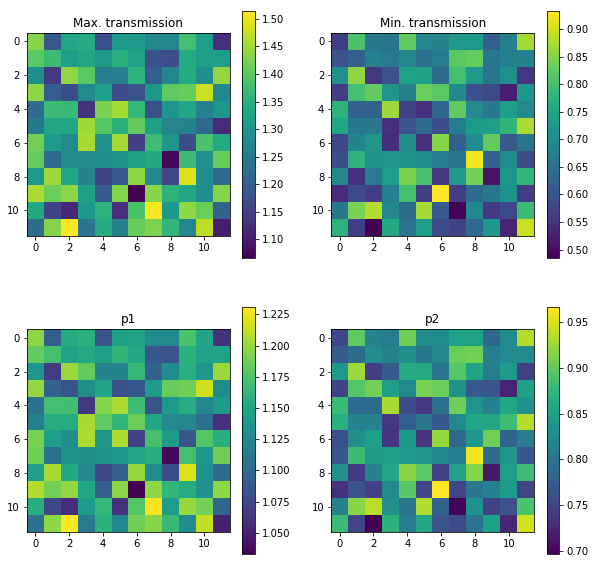


- Angles of M from diattenuation are:
The mean value of param Alpha is 28.52036089169087 +- 8.969561145709104
The mean value of param Delay is 44.02465830666584 +- 22.212980642884023
The mean value of param Azimuth is 23.028357000896865 +- 11.021558076854614
The mean value of param Ellipticity angle is 16.640806431235966 +- 9.10875861714192


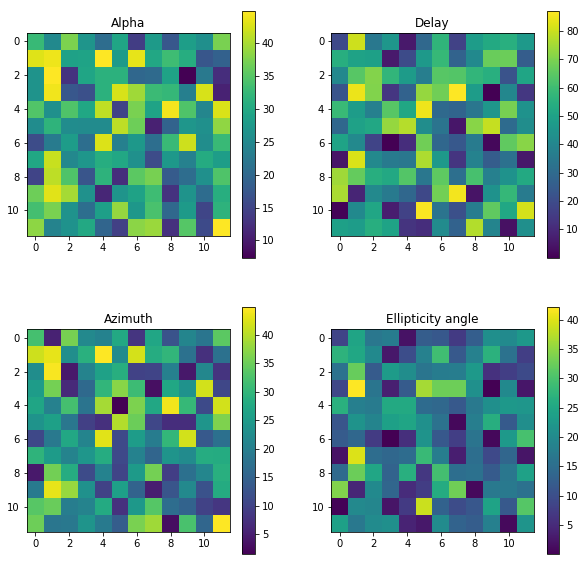


- Angles of M from polarizance are:
The mean value of param Alpha is 27.614260020293813 +- 10.113068587190014
The mean value of param Delay is 48.66603471013938 +- 22.162642165651125
The mean value of param Azimuth is 21.32331095308898 +- 12.470676716149386
The mean value of param Ellipticity angle is 17.169475476486287 +- 8.721979330177298


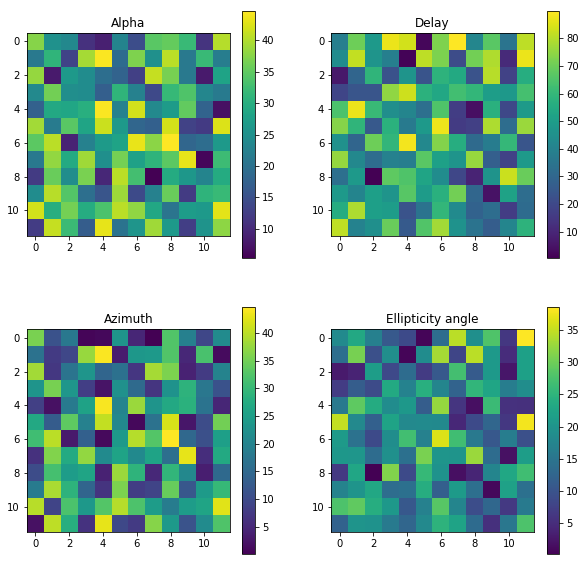


- Depolarization index of M:
The mean value is 0.9035748213972017 +- 0.02394612127220098


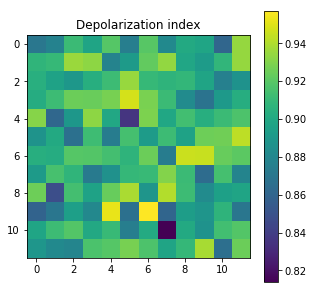

In [11]:
M = np.random.rand(4, 4,12,12) / 3
M[0, 0,:] = 1
M1 = Mueller()
M1.from_matrix(M)
_ = M1.analysis.depolarizer(draw=True)

In [39]:
# decompose_pure
N = 1
p1 = np.random.rand(N)/2 + 0.5
p2 = np.random.rand(N)/2
alphaD = np.random.rand(N) * 90*degrees
delayD = np.random.rand(N) * 360*degrees
alphaR = np.random.rand(N) * 90*degrees
delayR = np.random.rand(N) * 360*degrees
R = np.random.rand(N) * 180*degrees
print('Original:')
print('- p1 = {};   - p2 = {};   - alphaD = {};   - delayD = {}'.format(p1, p2, alphaD/degrees, delayD/degrees))
print('- R = {};   - alphaR = {};   - delayR = {}'.format(R/degrees, alphaR/degrees, delayR/degrees))

Mr, Md = create_Mueller(N=2)
Mr.retarder_charac_angles(R=R, alpha=alphaR, delay=delayR)
Md.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alphaD, delay=delayD)
M = Mr * Md
M.name = 'Test'
Mr2, Md2, param = M.analysis.decompose_pure(verbose=True, out_number=True, give_all=True)
print(param['Error'][0])
print(M, Mr2*Md2)
print(Md, Md2)
print(Mr, Mr2)

Original:
- p1 = [0.9601];   - p2 = [0.2038];   - alphaD = [4.9577];   - delayD = [176.714]
- R = [70.85];   - alphaR = [16.3056];   - delayR = [239.1435]

------------------------------------------------------
Pure decomposition of Test as M = Mr * Md.

Analysis of Diattenuator of Test as diattenuator:

- Transmissions of Diattenuator of Test are:
  Max. transmission
0.9218249244330041
  Min. transmission
0.04153513261060217
  p1
0.960117140995308
  p2
0.2038016992338439

- Angles of Diattenuator of Test are:
  Alpha
[4.9577]
  Delay
[176.714]
  Azimuth
[175.0503]
  Ellipticity angle
[0.2828]

Diattenuator of Test = 
[+0.482 +0.434 -0.076 +0.004]   
[+0.434 +0.473 -0.048 +0.003]   
[-0.076 -0.048 +0.204 -0.000]   
[+0.004 +0.003 -0.000 +0.196]   


Analysis of Retarder of Test as retarder:

- Retardance of Retarder of Test is:
70.85000458339863

- Angles of Retarder of Test are:
  Alpha
[16.3056]
  Delay
[239.1435]
  Azimuth
[170.9164]
  Ellipticity angle
[-13.7792]

Retarder of Test 

In [10]:
# decompose_pure
N = 1
p1 = np.random.rand(N)/2 + 0.5
p2 = 0
alphaD = np.random.rand(N) * 90*degrees
delayD = np.random.rand(N) * 360*degrees
alphaR = np.random.rand(N) * 90*degrees
delayR = np.random.rand(N) * 360*degrees
R = np.random.rand(N) * 180*degrees
print('Original:')
print('- p1 = {};   - p2 = {};   - alphaD = {};   - delayD = {}'.format(p1, p2, alphaD/degrees, delayD/degrees))
print('- R = {};   - alphaR = {};   - delayR = {}'.format(R/degrees, alphaR/degrees, delayR/degrees))

Mr, Md = create_Mueller(N=2)
Mr.retarder_charac_angles(R=R, alpha=alphaR, delay=delayR)
Md.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alphaD, delay=delayD)
M = Mr * Md
print(M)
M.name = 'Test'
Mr2, Md2, param = M.analysis.decompose_pure(verbose=True, out_number=False, give_all=True)
print(param['Error'][0])
print(M, Mr2*Md2)
print(Md, Md2)
print(Mr, Mr2)

Original:
- p1 = [0.6844];   - p2 = 0;   - alphaD = [45.6773];   - delayD = [186.664]
- R = [31.6211];   - alphaR = [21.3866];   - delayR = [239.4103]
M * M = 
[+0.234 -0.006 -0.233 -0.027]   
[+0.072 -0.002 -0.071 -0.008]   
[-0.215 +0.005 +0.213 +0.025]   
[+0.059 -0.001 -0.059 -0.007]   


------------------------------------------------------
Pure decomposition of Test as M = Mr * Md.

Analysis of Diattenuator of Test as diattenuator:

- Transmissions of Diattenuator of Test are:
  Max. transmission
[0.4684]
  Min. transmission
[0.]
  p1
[0.6844]
  p2
[0.]

- Angles of Diattenuator of Test are:
  Alpha
[45.6773]
  Delay
[186.664]
  Azimuth
[134.3181]
  Ellipticity angle
[-3.3311]

Diattenuator of Test = 
[+0.234 -0.006 -0.233 -0.027]   
[-0.006 +0.000 +0.005 +0.001]   
[-0.233 +0.005 +0.231 +0.027]   
[-0.027 +0.001 +0.027 +0.003]   


Analysis of Retarder of Test as retarder:

- Retardance of Retarder of Test is:
[29.0098]

- Angles of Retarder of Test are:
  Alpha
[21.1965]
  Del

In [20]:
# decompose_polar
N = 1
p1 = np.random.rand(N)/2 + 0.5
p2 = np.random.rand(N)/2
alphaD = np.random.rand(N) * 90*degrees
delayD = np.random.rand(N) * 360*degrees
alphaR = np.random.rand(N) * 90*degrees
delayR = np.random.rand(N) * 360*degrees
R = np.random.rand(N) * 180*degrees
print('Original:')
print('- p1 = {};   - p2 = {};   - alphaD = {};   - delayD = {}'.format(p1, p2, alphaD/degrees, delayD/degrees))
print('- R = {};   - alphaR = {};   - delayR = {}'.format(R/degrees, alphaR/degrees, delayR/degrees))

Mr, Md = create_Mueller(N=2)
Mr.retarder_charac_angles(R=R, alpha=alphaR, delay=delayR)
Md.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alphaD, delay=delayD)
M = Mr * Md
M.name = 'Test'
Mr2, Md2, Mp2, param = M.analysis.decompose_polar(verbose=True, out_number=True, give_all=True)
print(param['Error'][0])

Original:
- p1 = [0.5496];   - p2 = [0.4627];   - alphaD = [32.89];   - delayD = [38.9464]
- R = [130.9759];   - alphaR = [52.8139];   - delayR = [214.7134]

------------------------------------------------------
Pure decomposition of Test as M = Mp * Mr * Md.

Analysis of Diattenuator of Test as diattenuator:

- Transmissions of Diattenuator of Test are:
  Max. transmission
0.3021018395211475
  Min. transmission
0.2141274413050223
  p1
0.549637916742602
  p2
0.46273906394967596

- Angles of Diattenuator of Test are:
  Alpha
[32.89]
  Delay
[38.9464]
  Azimuth
[29.9776]
  Ellipticity angle
[17.489]

Diattenuator of Test = 
[+0.258 +0.018 +0.031 +0.025]   
[+0.018 +0.255 +0.001 +0.001]   
[+0.031 +0.001 +0.256 +0.002]   
[+0.025 +0.001 +0.002 +0.256]   


Analysis of Retarder of Test as retarder:

- Retardance of Retarder of Test is:
130.97588719803977

- Angles of Retarder of Test are:
  Alpha
[52.8139]
  Delay
[214.7134]
  Azimuth
[125.6033]
  Ellipticity angle
[-16.6293]

Retarder of

In [13]:
N = 10
p1 = np.random.rand(N)/2 + 0.5
p2 = np.random.rand(N)/2
alphaD = np.random.rand(N) * 90*degrees
delayD = np.random.rand(N) * 360*degrees
alphaR = np.random.rand(N) * 90*degrees
delayR = np.random.rand(N) * 360*degrees
R = np.random.rand(N) * 180*degrees
M = np.array([[1, 0, 0, 0], [0.1, 1, 0.1, 0], [0.1, 0.1, 1, 0], [0.1, 0, 0, 1]])
print('Original:')
print('- p1 = {};   - p2 = {};   - alphaD = {};   - delayD = {}'.format(p1, p2, alphaD/degrees, delayD/degrees))
print('- R = {};   - alphaR = {};   - delayR = {}'.format(R/degrees, alphaR/degrees, delayR/degrees))

Mr, Md, Mp = create_Mueller(N=3)
Mr.retarder_charac_angles(R=R, alpha=alphaR, delay=delayR)
Md.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alphaD, delay=delayD)
Mp.from_matrix(M)
print(Mp)
M = Mp * Mr * Md
M.name = 'Test'
Mr2, Md2, Mp2, param = M.analysis.decompose_polar(verbose=True, out_number=True, give_all=True)
print(param['Error'][0])
# print(M, Mp*Mr2*Md2)
# print(Md, Md2)
# print(Mr, Mr2)

Original:
- p1 = [0.6961 0.5077 0.5422 0.5417 0.7838 0.8629 0.824  0.732  0.9066 0.5203];   - p2 = [0.0322 0.3413 0.4621 0.1093 0.1978 0.0391 0.0301 0.3383 0.4349 0.4595];   - alphaD = [41.1778 17.9788 30.657  76.0051 77.9804  6.1454 21.2432 10.8402 23.5837 87.1095];   - delayD = [306.3713  32.8284 194.9824  78.9471 259.6737 273.5907 152.8556  29.0517  73.6388 135.0596]
- R = [ 80.842    7.8861  17.7132 175.5591   9.4835  87.3601 115.1501 178.7143  11.2236 139.3572];   - alphaR = [48.4557 31.0606 12.8383 32.6051 20.9905 65.3467 50.85   80.0824 62.4308  0.8239];   - delayR = [293.1815 256.696  301.8528 237.5979 202.7629 281.5512 157.4269 333.6166 158.5144 356.3381]
M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.100 +1.000 +0.100 +0.000]   
[+0.100 +0.100 +1.000 +0.000]   
[+0.100 +0.000 +0.000 +1.000]   


------------------------------------------------------
Polar decomposition of Test as M = Mp * Mr * Md.

Analysis of Diattenuator of Test as diattenuator:

- Transmissions of Diattenuator 

d:\codigo_ucm\py_pol\py_pol\mueller.py:3341: RuntimeWarning: invalid value encountered in sqrt
  DI = sqrt(1. - PP**2)


M = 
[+1.000 +0.000 +0.000 +0.000]   
[+0.100 +1.000 +0.100 +0.000]   
[+0.100 +0.100 +1.000 +0.000]   
[+0.100 +0.000 +0.000 +1.000]   


------------------------------------------------------
Polar decomposition of Test as M = Mp * Mr * Md.

Analysis of Diattenuator of Test as diattenuator:

- Transmissions of Diattenuator of Test are:
The mean value of param Max. transmission is 0.6032101718767281 +- 0.2235705902844227
The mean value of param Min. transmission is 0.09205792042692741 +- 0.0777538314092518
The mean value of param p1 is 0.7623370669036756 +- 0.14850039832077444
The mean value of param p2 is 0.2658744165627374 +- 0.14618041949711116


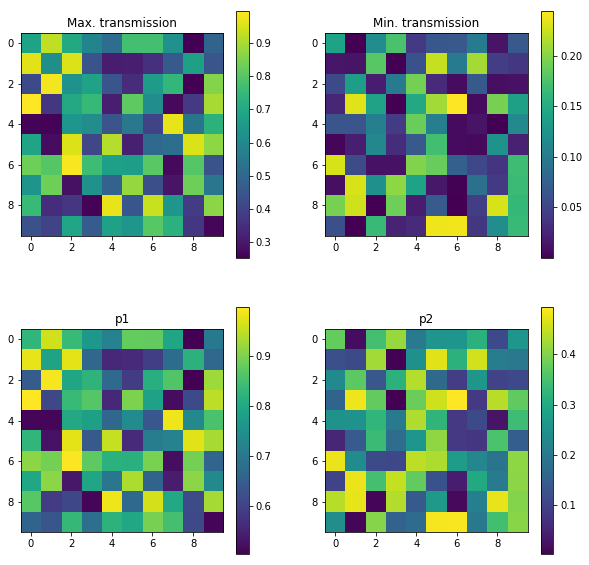


- Angles of Diattenuator of Test are:
The mean value of param Alpha is 44.051714588363765 +- 27.675021388711738
The mean value of param Delay is 190.0881980516077 +- 96.57809891292938
The mean value of param Azimuth is 92.28139269592697 +- 55.48106413176737
The mean value of param Ellipticity angle is -2.848368453691089 +- 15.020430070620431


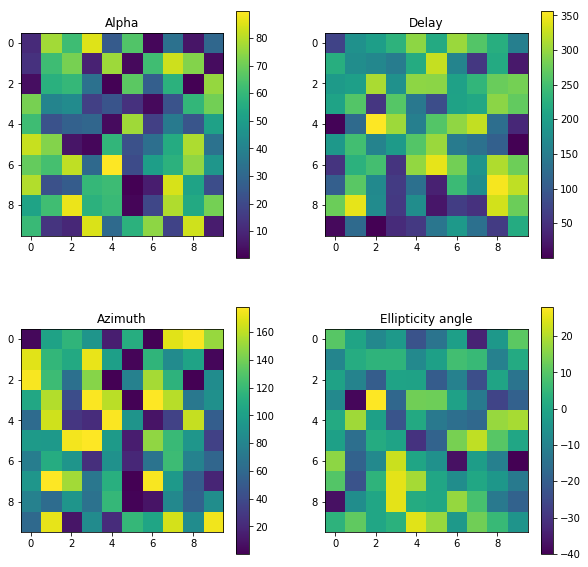



Analysis of Retarder of Test as retarder:

- Retardance of Retarder of Test is:
The mean value is 87.82282215549145 +- 54.81048616385986


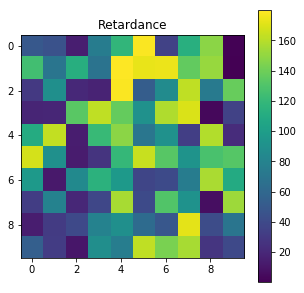


- Angles of Retarder of Test are:
The mean value of param Alpha is 49.70969796587799 +- 25.170956114136803
The mean value of param Delay is 209.95458633789448 +- 102.07716499611865
The mean value of param Azimuth is 84.34000212170776 +- 48.4889080563305
The mean value of param Ellipticity angle is -4.071428750404528 +- 15.439780090788366


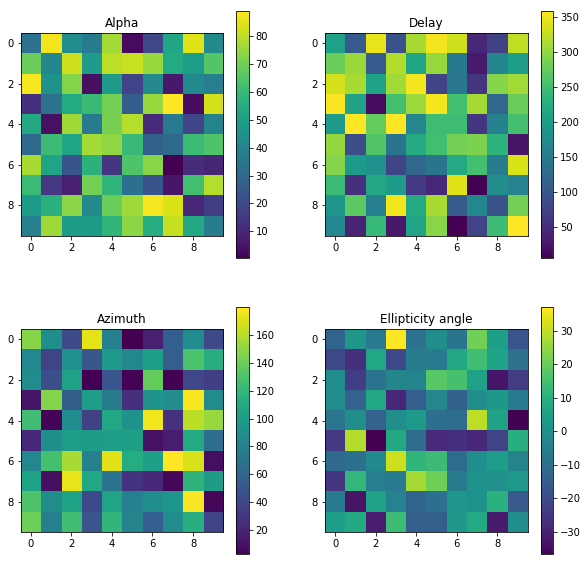



Analysis of Depolarizer of Test as depolarizer:
- Transmissions of Depolarizer of Test from diattenuation are:


d:\codigo_ucm\py_pol\py_pol\mueller.py:3341: RuntimeWarning: invalid value encountered in sqrt
  DI = sqrt(1. - PP**2)


The mean value of param Max. transmission is 1.0 +- 0.0
The mean value of param Min. transmission is 1.0 +- 0.0
The mean value of param p1 is 1.0 +- 0.0
The mean value of param p2 is 1.0 +- 0.0


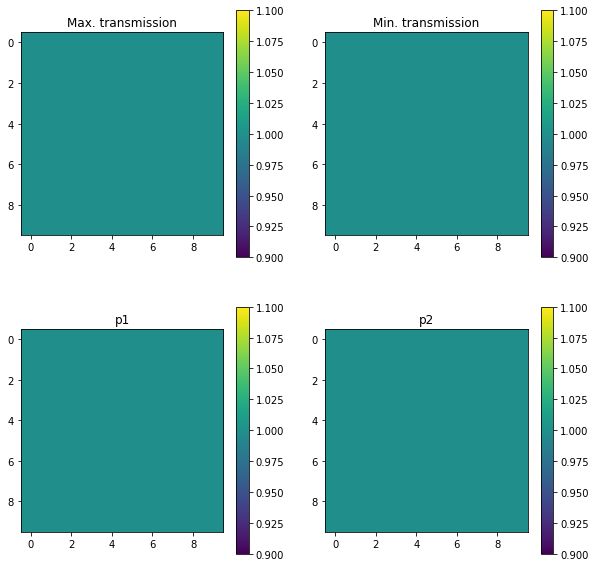


- Transmissions of Depolarizer of Test from polarizance are:
The mean value of param Max. transmission is 1.173205080756807 +- 7.750477463015123e-13
The mean value of param Min. transmission is 0.8267949192431928 +- 7.750511169559695e-13
The mean value of param p1 is 1.083145918497045 +- 3.5776793767576323e-13
The mean value of param p2 is 0.9092826399108215 +- 4.261878196846377e-13


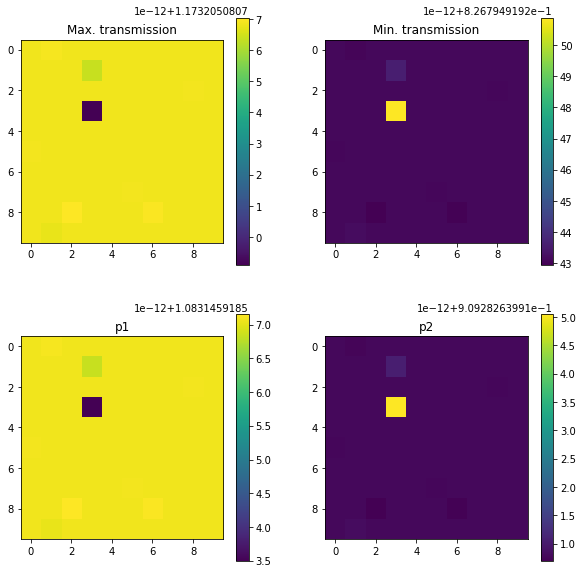


- Angles of Depolarizer of Test from diattenuation are:
The mean value of param Alpha is 45.0 +- 0.0
The mean value of param Delay is 0.0 +- 0.0
The mean value of param Azimuth is 45.0 +- 0.0
The mean value of param Ellipticity angle is 0.0 +- 0.0


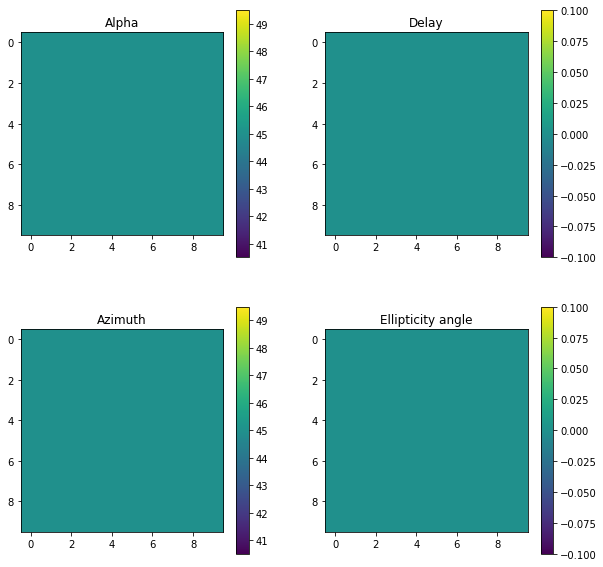


- Angles of Depolarizer of Test from polarizance are:
The mean value of param Alpha is 27.3678051586662 +- 4.527266948611808e-10
The mean value of param Delay is 45.00000000005739 +- 5.709826380732863e-10
The mean value of param Azimuth is 22.500000000031818 +- 3.3751884430434944e-10
The mean value of param Ellipticity angle is 17.632194841419388 +- 4.281966007138738e-10


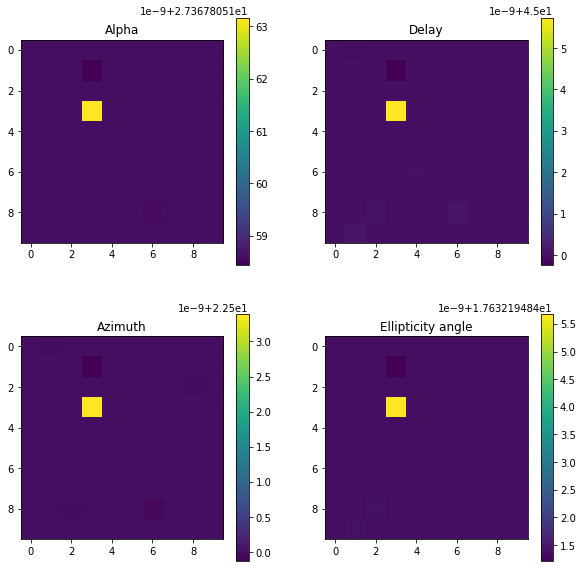


- Depolarization index of Depolarizer of Test is:
The mean value is nan +- nan


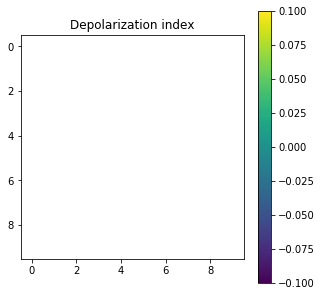


(10, 10)
Test decomposition mean square error:
The mean value is 2.615520434363352e-15 +- 2.1039824664999805e-14


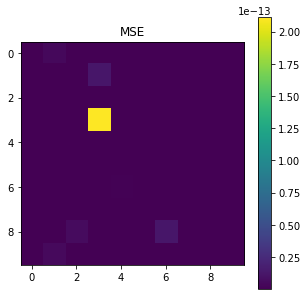


------------------------------------------------------



In [24]:
N = 10
p1 = np.random.rand(N,N)/2 + 0.5
p2 = np.random.rand(N,N)/2
alphaD = np.random.rand(N,N) * 90*degrees
delayD = np.random.rand(N,N) * 360*degrees
alphaR = np.random.rand(N,N) * 90*degrees
delayR = np.random.rand(N,N) * 360*degrees
R = np.random.rand(N,N) * 180*degrees
M = np.array([[1, 0, 0, 0], [0.1, 1, 0.1, 0], [0.1, 0.1, 1, 0], [0.1, 0, 0, 1]])

Mr, Md, Mp = create_Mueller(N=3)
Mr.retarder_charac_angles(R=R, alpha=alphaR, delay=delayR)
Md.diattenuator_charac_angles(p1=p1, p2=p2, alpha=alphaD, delay=delayD)
Mp.from_matrix(M)
print(Mp)
M = Mp * Mr * Md
M.name = 'Test'
Mr2, Md2, Mp2, param = M.analysis.decompose_polar(draw=True, out_number=True, give_all=True)

In [20]:
M = np.random.rand(4,4,12,35)
M1 = Mueller()
M1.from_matrix(M)
val, vect = M1.parameters.eig(values_as_matrix=True, vectors_as_matrix=True)
print(val.shape, vect.shape)

(4, 12, 35) (4, 4, 12, 35)


## Tests

##### filter_physicall_conditions

In [ ]:
M1 = Mueller()
M1.diattenuator_retarder_azimuth_ellipticity(p1=0.7, p2=0.1, azimuth=30*degrees, ellipticity=35*degrees)
M2 = Mueller()
M2.from_blocks(m=np.random.rand(3,3)*0.1+0.9)
M1 = M2 * M1
print(M1)

M2 = M1.covariance_matrix(keep=True)
print(M2)
val, vect = M1.parameters.eig(values_as_matrix=True, vectors_as_matrix=True, shape=False)
print('Values', val)
print('Vect:', vect)
H, diag, Ht = create_Mueller(('H', 'dial', 'Ht'))
diag.from_components([val[0, :]] + 4 * [0] + [val[1, :]] +
                     4 * [0] + [val[2, :]] + 4 * [0] + [val[3, :]])
Ht.from_matrix(np.conj(vect))
H.from_matrix(np.transpose(vect, axes=(1, 0, 2)))
print(H, diag, Ht)
result = H * diag * Ht
print(result)
M2.from_covariance(result)
print(M2)


In [ ]:
M = np.random.rand(4, 4)
M1 = Mueller()
M1.from_matrix(M)
print(M1)

M2 = M1.covariance_matrix(keep=True)
M2.from_covariance(M2)
print(M2)

In [ ]:
M1 = Mueller()
M1.diattenuator_retarder_azimuth_ellipticity(p1=0.7, p2=0.1, azimuth=30*degrees, ellipticity=35*degrees)
M2 = Mueller()
M2.from_blocks(m=np.random.rand(3,3)*0.1+0.9)
M1 = M2 * M1
M1.covariance_matrix()
M = M1.M[:,:,0]
print(M)

val, vect = np.linalg.eig(M)
print(val)
H = vect
diag = np.diag(val)
Ht = np.transpose(np.conj(vect))
result = H@diag@Ht
print(result)
print(np.linalg.norm(result-M))

In [ ]:
M1 = Mueller()
M1.diattenuator_retarder_azimuth_ellipticity(p1=0.7, p2=0.1, azimuth=30*degrees, ellipticity=35*degrees)
M2 = Mueller()
M2.from_blocks(m=np.random.rand(3,3)*0.1+0.9)
M1 = M2 * M1
M1.covariance_matrix()
M = M1.M[:,:,0]
print(M)

val, vect = np.linalg.eig(M)
print(val)
H = vect
diag = np.diag(val)
Ht = np.transpose(np.conj(vect))
result = H@diag@Ht
print(result)
print(np.linalg.norm(result-M))

Ho, diago, Hto = create_Mueller(('H', 'dial', 'Ht'))
Ho.from_matrix(H)
diago.from_matrix(diag)
Hto.from_matrix(Ht)
result = Ho * diago * Hto
print(result)
print(np.linalg.norm(result.M[:,:,0]-M), '\n\n\n')

val, vect = M1.parameters.eig(values_as_matrix=True, vectors_as_matrix=True, shape=False)
H, diag, Ht = create_Mueller(('H', 'dial', 'Ht'))
diag.from_components([val[0, :]] + 4 * [0] + [val[1, :]] +
                     4 * [0] + [val[2, :]] + 4 * [0] + [val[3, :]])
H.from_matrix(vect)
Ht.from_matrix(np.transpose(np.conj(vect), axes=(1, 0, 2)))
print(Ho, H, '\n', diago, diag, '\n', Hto, Ht)
result = H * diag * Ht
print(result)
print(np.linalg.norm(result.M[:,:,0]-M))

In [ ]:
M1 = Mueller()
M1.diattenuator_retarder_azimuth_ellipticity(p1=0.7, p2=0.1, azimuth=30*degrees, ellipticity=35*degrees)
M2 = Mueller()
M2.from_blocks(m=np.random.rand(3,3)*0.1+0.9)
M1 = M2 * M1
print(M1)


M1.covariance_matrix()
val, vect = M1.parameters.eig(values_as_matrix=True, vectors_as_matrix=True, shape=False)
H, diag, Ht = create_Mueller(('H', 'dial', 'Ht'))
diag.from_components([val[0, :]] + 4 * [0] + [val[1, :]] +
                     4 * [0] + [val[2, :]] + 4 * [0] + [val[3, :]])
H.from_matrix(vect)
Ht.from_matrix(np.transpose(np.conj(vect), axes=(1, 0, 2)))
result = H * diag * Ht
M2.from_covariance(result)
print(result)
print(np.linalg.norm(result.M[:,:,0]-M))